In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(color_codes = True)

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, TimeDistributed, RepeatVector, LSTM, Masking
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [6]:
analog = pd.read_excel('/home/ubuntu/jaeyoung/N_ANALOG_DATA_ETC_01_0002.xlsx')

In [7]:
print(len(analog))

259191


In [8]:
analog[:100]

seq       e_code         create_time             insert_time  \
0   708326461  ETC-01-0002 2019-12-06 00:00:00 2019-12-09 16:31:47.620   
1   708326511  ETC-01-0002 2019-12-06 00:00:01 2019-12-09 16:31:47.620   
2   708326539  ETC-01-0002 2019-12-06 00:00:02 2019-12-09 16:31:47.620   
3   708326588  ETC-01-0002 2019-12-06 00:00:03 2019-12-09 16:31:47.620   
4   708326637  ETC-01-0002 2019-12-06 00:00:04 2019-12-09 16:31:47.620   
..        ...          ...                 ...                     ...   
95  708330176  ETC-01-0002 2019-12-06 00:01:35 2019-12-09 16:31:47.620   
96  708330215  ETC-01-0002 2019-12-06 00:01:36 2019-12-09 16:31:47.620   
97  708330244  ETC-01-0002 2019-12-06 00:01:37 2019-12-09 16:31:47.620   
98  708330303  ETC-01-0002 2019-12-06 00:01:38 2019-12-09 16:31:47.620   
99  708330342  ETC-01-0002 2019-12-06 00:01:39 2019-12-09 16:31:47.620   

    status  op_start  op_end  op_result  cycle_time   d1  ...  d81  d82  d83  \
0        0         0       0          0         140  0.0  ...    1   29   25   
1        0         0       0          0         140  0.0  ...    1   29   25   
2        0         0       0          0         140  0.0  ...    1   29   25   
3        0         0       0          0         140  0.0  ...    1   29   25   
4        0         0       0          0         140  0.0  ...    1   29   25   
..     ...       ...     ...        ...         ...  ...  ...  ...  ...  ...   
95       0         0       0          0         140  0.0  ...    1   29   26   
96       0         0       0          0         140  0.0  ...    1   29   25   
97       0         0       0          0         140  0.0  ...    1   29   26   
98       0         0       0          0         140  0.0  ...    1   29   25   
99       0         0       0          0         140  0.0  ...    1   29   25   

    d84  d85  d86      d87       d88      d89  d90  
0    29    0    0  12.2658  176.4167  11.0210    0  
1    30    0    0  12.2658  139.8803  11.1246    0  
2    30    0    0  12.4421  139.8803  11.1246    0  
3    30    0    0  12.4421  139.8803  11.3983    0  
4    30    0    0  12.4421  266.1160  11.3983    0  
..  ...  ...  ...      ...       ...      ...  ...  
95   29    0    0  11.9341  432.2159  10.4478    0  
96   29    0    0  11.9341  432.2159  10.6660    0  
97   29    0    0  11.9341  144.6292  10.6660    0  
98   29    0    0  11.9635  144.6292  10.6660    0  
99   30    0    0  11.9635  144.6292  10.4406    0  

[100 rows x 99 columns]

In [9]:
analog_arr = np.array(analog)
analog_arr = np.transpose(analog_arr)
li = []
for idx in range(0,99):
    if len(set(analog_arr[idx]))!=1:
        li.append(idx)
print(len(li))

46


In [10]:
#value -8 = dn

In [11]:
tmp_analog = analog.loc[:,['op_start','op_end','op_result','d15','d16','d17','d18','d19','d20','d21','d22','d23','d24','d25'
                           ,'d26','d27','d28','d29','d30','d31','d32','d33','d34','d35','d36','d37','d38','d39','d40',
                           'd55','d56','d57','d58','d59','d60','d65','d81','d82','d83','d84','d87','d88','d89'
                    ]]
tmp_analog[1:2]


op_start  op_end  op_result  d15  d16  d17  d18  d19  d20  d21  ...  \
1         0       0          0    5   15    4    0    5    3    1  ...   

       d59    d60  d65  d81  d82  d83  d84      d87       d88      d89  
1  11.1246  16689  202    1   29   25   30  12.2658  139.8803  11.1246  

[1 rows x 43 columns]

In [12]:
tmp_analog[(analog['op_end']==1) & (analog['op_result']==0)]

op_start  op_end  op_result  d15  d16  d17  d18  d19  d20  d21  ...  \
52641         0       1          0    4   15    4    0    5    3    0  ...   
53207         0       1          0    5   15    4    0    5    3    1  ...   
65503         0       1          0    5   14    4    0    5    3    1  ...   
68214         0       1          0    5   14    4    0    5    3    1  ...   

           d59    d60  d65  d81  d82  d83  d84      d87        d88      d89  
52641  14.8271  16749   30    4   29   26   25  26.2350  1937.2280  14.8271  
53207  35.4489  16909   48    1   29   26   25  14.6662   428.7737  35.4489  
65503  11.7532  16700   28    2   31   26   29  15.2428  1054.0900  11.7532  
68214  11.8487  16701    9    1   29   25   31  95.2594   665.8999  11.8487  

[4 rows x 43 columns]

In [13]:
analog_list = tmp_analog.values.tolist()
analog_list[2]

[0.0,
 0.0,
 0.0,
 5.0,
 15.0,
 4.0,
 0.0,
 5.0,
 3.0,
 1.0,
 1.0,
 4.0,
 2.0,
 1.0,
 4.0,
 27.0,
 14.0,
 5.0,
 6.0,
 1.0,
 2.0,
 5.0,
 6.0,
 1.0,
 2.0,
 5.0,
 0.0,
 1.0,
 2.0,
 12.4421,
 16711.0,
 139.8803,
 17163.0,
 11.1246,
 16689.0,
 202.0,
 1.0,
 29.0,
 25.0,
 30.0,
 12.4421,
 139.8803,
 11.1246]

In [14]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(tmp_analog['d15'][:259191], label='d19', color='red', animated = True, linewidth=1)
ax.plot(tmp_analog['d15'][:259191], label='d15', color='red', animated = True, linewidth=1)
ax.plot(tmp_analog['d16'][:259191], label='d16', color='green', animated = True, linewidth=1)
ax.plot(tmp_analog['d17'][:259191], label='d17', color='black', animated = True, linewidth=1)
ax.plot(tmp_analog['d83'][:259191], label='d18', color='yellow', animated = True, linewidth=1)
plt.legend(loc='lower left')
ax.set_title('koiia Data', fontsize=16)
plt.show()

In [66]:
tmp = []
input_list= []
output_list =[]
array = np.array([])
# d1 = 9
# d2 = 10
# d15 = 23
# d16 = 24
# d17= 25
# d18 = 26
for idx, values in enumerate(analog_list):
    #input 정리(op_start)
    if (values[0] == 1):
        tmp.append(values[3:])

    #output 정리 (op_end)
    if (values[1] == 1):
        #array 변경 작업
        array = np.array(tmp)
        sz = array.size
        if sz: 
            input_list.append(array)
            output_list.append(values[2])
        else : 
            print(idx)
        tmp = []
        
#input 갯수 4226
print(len(input_list))
print(len(output_list))
#array 변경 작업
input_arr = np.array(input_list)
output_arr = np.array(output_list)
print(input_arr.shape)
print(input_arr[0].shape)
print(output_arr.shape)

20485
42565
56604
81743
102115
103575
103698
234104
4154
4154
(4154,)
(14, 40)
(4154,)


<ipython-input-66-6de48e2a66fb>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  input_arr = np.array(input_list)


In [67]:
np.where(output_arr==0)

(array([1993, 2017, 2413, 2539]),)

In [75]:
#정상 데이터
x = np.transpose(input_arr[1992])
z = np.transpose(input_arr[2018])
#비정상 데이터
y = np.transpose(input_arr[1993])
q = np.transpose(input_arr[2017])
for i in range(0,x.shape[0]):
    print(set(x[i]))
    print(set(z[i]))
    print(set(y[i]))
    print(set(q[i]))
    print('-------------')



{4.0}
{0.0, 4.0}
{4.0}
{5.0}
-------------
{15.0}
{14.0, 15.0}
{15.0}
{15.0}
-------------
{4.0}
{4.0}
{4.0}
{4.0}
-------------
{0.0}
{0.0}
{0.0}
{0.0}
-------------
{5.0}
{0.0, 5.0}
{5.0}
{5.0}
-------------
{3.0}
{3.0}
{3.0}
{3.0}
-------------
{1.0}
{0.0, 1.0}
{0.0, 1.0}
{1.0}
-------------
{1.0}
{1.0}
{1.0, 2.0}
{1.0, 2.0}
-------------
{4.0}
{4.0}
{4.0, 5.0}
{4.0, 5.0}
-------------
{2.0}
{0.0, 2.0}
{2.0, 3.0}
{2.0, 3.0}
-------------
{2.0}
{0.0, 1.0}
{2.0}
{1.0, 2.0}
-------------
{3.0}
{4.0}
{3.0, 4.0}
{4.0}
-------------
{12.0, 29.0}
{28.0, 12.0, 29.0}
{12.0, 29.0}
{12.0, 29.0}
-------------
{14.0}
{0.0, 14.0, 15.0}
{14.0}
{14.0}
-------------
{5.0, 6.0}
{5.0, 6.0}
{8.0, 5.0, 6.0}
{5.0, 6.0, 7.0}
-------------
{2.0, 5.0, 6.0}
{0.0, 2.0, 3.0, 6.0}
{2.0, 5.0, 6.0}
{2.0, 5.0, 6.0}
-------------
{2.0}
{0.0, 1.0}
{2.0}
{1.0, 2.0}
-------------
{1.0}
{2.0}
{1.0}
{1.0, 2.0}
-------------
{5.0, 7.0}
{5.0, 6.0, 7.0}
{8.0, 5.0, 7.0}
{5.0, 6.0, 7.0}
-------------
{5.0, 6.0}
{0.0, 6.0}
{5

In [45]:
from collections import Counter

lis = []
for i in range(0,input_arr.shape[0]):
    lis.append(input_arr[i].shape[0])
Counter(lis)

Counter({14: 2998,
         15: 462,
         13: 571,
         319: 1,
         48: 2,
         12: 20,
         33: 9,
         17: 11,
         38: 2,
         88: 1,
         18: 6,
         16: 10,
         894: 1,
         9: 2,
         29: 3,
         34: 3,
         25: 3,
         26: 2,
         28: 1,
         1998: 1,
         367: 1,
         1401: 1,
         32: 7,
         51: 4,
         478: 1,
         23: 1,
         65: 1,
         579: 1,
         147: 1,
         804: 1,
         11: 1,
         59: 2,
         86: 2,
         1033: 1,
         54: 1,
         19: 2,
         58: 1,
         22: 4,
         21: 3,
         42: 1,
         256: 1,
         8: 1,
         31: 1,
         24: 2,
         174: 1,
         284: 1,
         47: 1})

In [46]:
def rescale_data(data, scaler_type = StandardScaler):
    input_=[]
    for i in range(0,len(data)):
        tmp = data[i].reshape(-1,1)
        x = scaler_type().fit_transform(tmp)
        x = x.reshape(-1,40)
        input_.append(x)
        
    return np.array(input_) 

In [47]:
input_arr = rescale_data(input_arr)
print(len(input_arr))

4154


<ipython-input-46-6c317d37d021>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(input_)


In [48]:
np.where(output_arr==0)

(array([1993, 2017, 2413, 2539]),)

In [49]:
input_arr[2539].shape

(12, 40)

In [50]:
fault_arr = input_arr[[1993,2017,2413,2539]]
fault_arr.shape

(4,)

In [51]:
input_arr = np.delete(input_arr,[1993,2017,2413,2529],0)
input_arr.shape

(4150,)

In [52]:
Xs =[]
time_stmp = 8
arr= np.array([])
for i in range(0,input_arr.shape[0]):
    for y in range(input_arr[i].shape[0]-time_stmp):
        Xs.append(input_arr[i][y:y+time_stmp])
    arr = np.array(Xs)

print(arr.shape)


(34715, 8, 40)


In [53]:
tmps= []
tmp_arr = np.array([])
for i in range(0,fault_arr.shape[0]):
    for y in range(input_arr[i].shape[0]-time_stmp):
         tmps.append(input_arr[i][y:y+time_stmp])
    tmp_arr = np.array(tmps)
print(tmp_arr.shape)

(24, 8, 40)


In [54]:
input_arr = np.vstack((arr,tmp_arr))
print(input_arr.shape)

(34739, 8, 40)


In [55]:
X_train, X_test = train_test_split(input_arr, test_size = 0.2)
print(X_train.shape, X_test.shape)

(27791, 8, 40) (6948, 8, 40)


In [56]:
opt = Adam(lr=1e-4)
model = Sequential()
model.add(Masking(mask_value=0., input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128,return_sequences = True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))

model.compile(loss='mae', optimizer = opt)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking (Masking)            (None, 8, 40)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector (RepeatVector) (None, 8, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 128)            131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 128)            0         
_________________________________________________________________
time_distributed (TimeDistri (None, 8, 40)             5

In [ ]:
nb_epochs = 20
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')]
                   ).history

In [1]:
my_model = model.save('yg_model.h5')

NameError: name 'model' is not defined

In [57]:
my_model = load_model('yg_model.h5')

In [78]:
#Finding Anomalies
X_train_pred = my_model.predict(X_train)
print(X_train_pred[1])
print('----------------------')
print(X_train[1])
#mae = Mean Absolute Error
train_mae_loss = np.mean(np.abs(X_train_pred - X_train), axis =1)
train_mae_loss = np.transpose(train_mae_loss)
train_mae_loss.shape


[[-0.2972457  -0.2949087  -0.29717383 -0.2981126  -0.29705215 -0.29747543
  -0.29794303 -0.29777226 -0.29719725 -0.29763108 -0.29787773 -0.29731753
  -0.29169622 -0.2950661  -0.29695705 -0.29743958 -0.29779518 -0.297749
  -0.2968205  -0.29677972 -0.297719   -0.2977675  -0.2970319  -0.29730037
  -0.297902   -0.29773247 -0.28313768  3.4798846  -0.21878135  3.5481882
  -0.2898246   3.454935   -0.25753602 -0.29746035 -0.29197314 -0.29184303
  -0.29163912 -0.28332388 -0.21869464 -0.28985348]
 [-0.2971784  -0.29484418 -0.29707468 -0.2980152  -0.29692832 -0.29736972
  -0.29785487 -0.29768646 -0.29712987 -0.29755658 -0.2977837  -0.2972346
  -0.29171178 -0.29497343 -0.29686362 -0.2973366  -0.2977209  -0.29767367
  -0.29673767 -0.29668188 -0.2976341  -0.29768094 -0.29693246 -0.297214
  -0.29781857 -0.2976544  -0.27689517  3.5003026  -0.2190859   3.555439
  -0.2838637   3.4730794  -0.2575023  -0.2972572  -0.291791   -0.29174784
  -0.29135638 -0.27712592 -0.21901713 -0.28387716]
 [-0.2971134  -0.2

(40, 27791)

0
----------------------------------


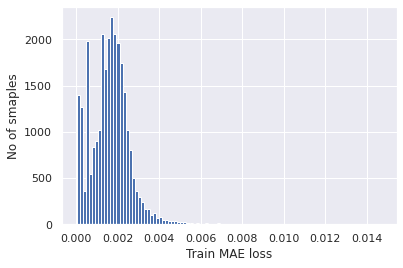

Reconstruction error threshold:  0.014696640106526881
1
----------------------------------


Reconstruction error threshold:  0.014242591094503789
2
----------------------------------


Reconstruction error threshold:  0.014315410727186395
3
----------------------------------


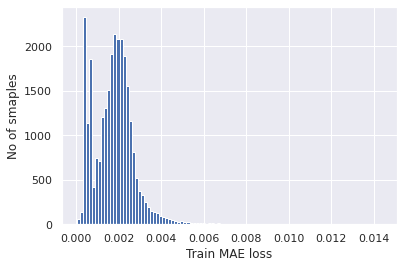

Reconstruction error threshold:  0.014352298815712733
4
----------------------------------


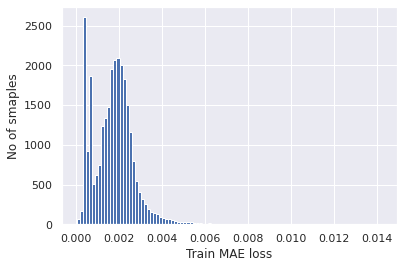

Reconstruction error threshold:  0.014183015772624208
5
----------------------------------


Reconstruction error threshold:  0.014372992605327456
6
----------------------------------


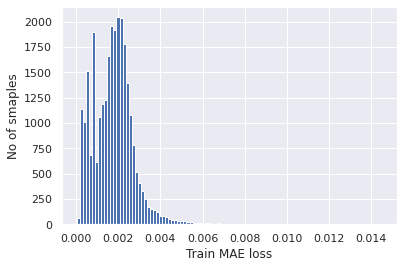

Reconstruction error threshold:  0.014470243303209451
7
----------------------------------


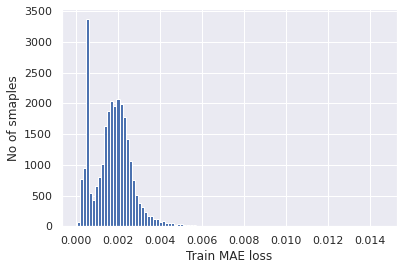

Reconstruction error threshold:  0.01454181544306865
8
----------------------------------


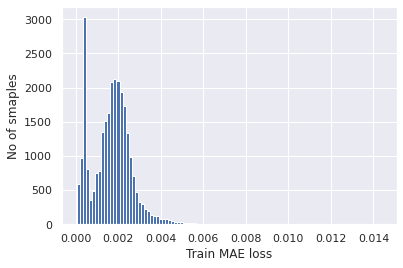

Reconstruction error threshold:  0.014367920556588365
9
----------------------------------


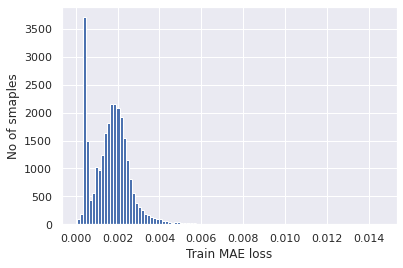

Reconstruction error threshold:  0.014595953158333286
10
----------------------------------


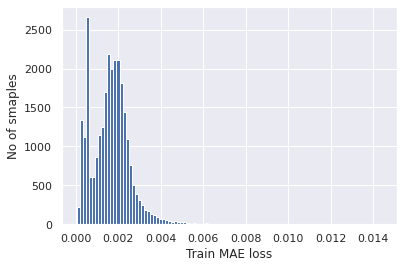

Reconstruction error threshold:  0.014385908252789958
11
----------------------------------


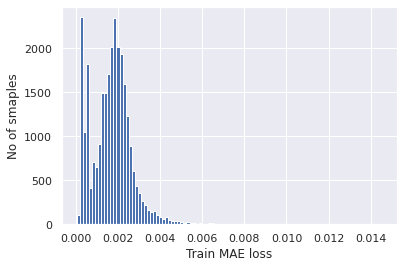

Reconstruction error threshold:  0.014503461518807603
12
----------------------------------


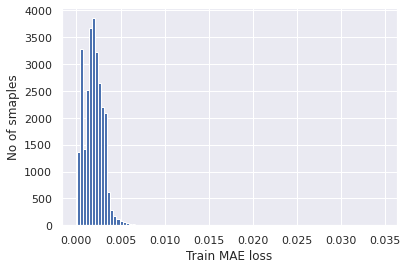

Reconstruction error threshold:  0.034534039790045455
13
----------------------------------


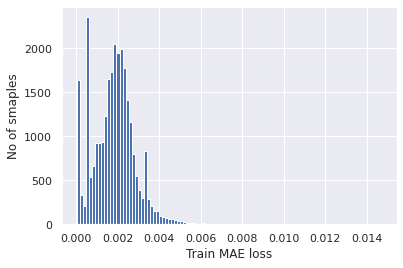

Reconstruction error threshold:  0.01468720707751145
14
----------------------------------


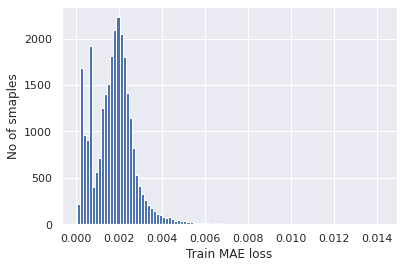

Reconstruction error threshold:  0.014215624794173671
15
----------------------------------


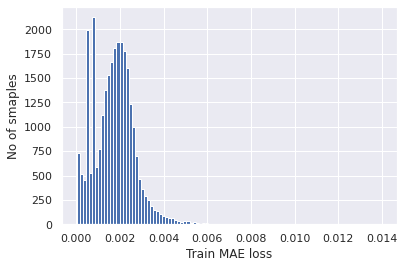

Reconstruction error threshold:  0.013964575443232555
16
----------------------------------


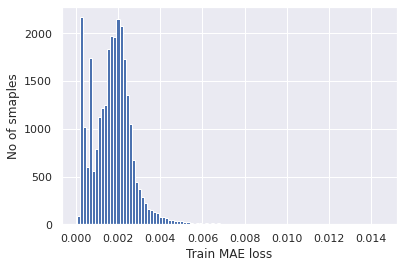

Reconstruction error threshold:  0.01448882505121818
17
----------------------------------


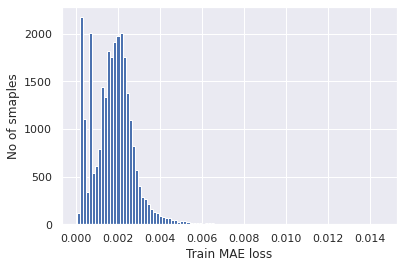

Reconstruction error threshold:  0.014534852875500825
18
----------------------------------


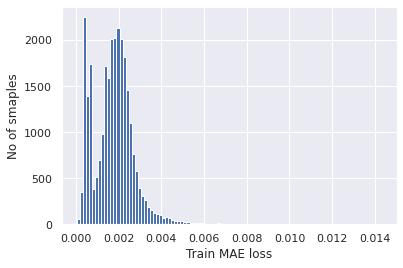

Reconstruction error threshold:  0.014299604013371898
19
----------------------------------


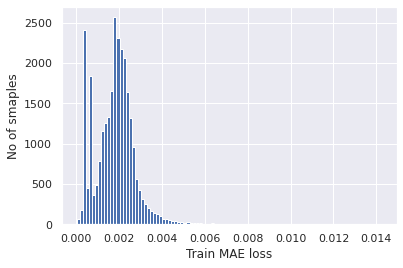

Reconstruction error threshold:  0.01422625653160512
20
----------------------------------


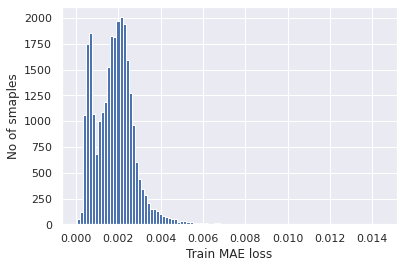

Reconstruction error threshold:  0.014421658242219512
21
----------------------------------


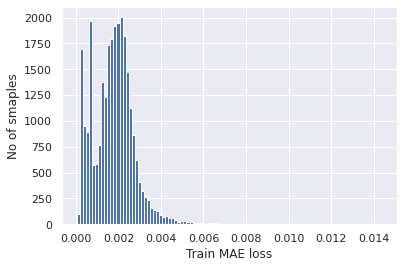

Reconstruction error threshold:  0.014362438989907411
22
----------------------------------


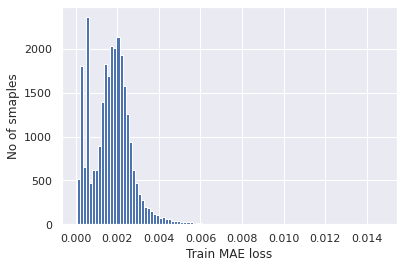

Reconstruction error threshold:  0.014688206049291164
23
----------------------------------


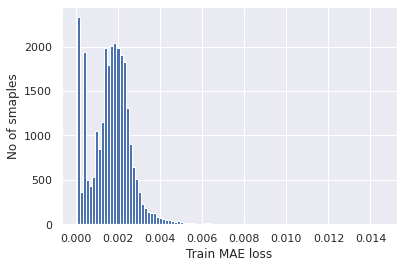

Reconstruction error threshold:  0.014514930505145372
24
----------------------------------


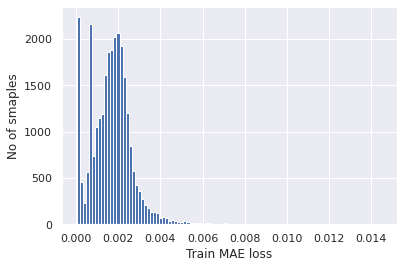

Reconstruction error threshold:  0.014477272860004886
25
----------------------------------


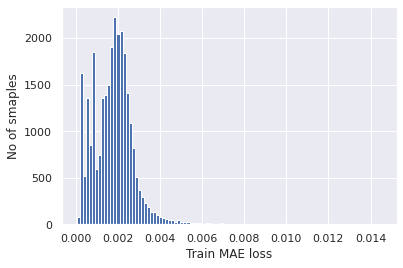

Reconstruction error threshold:  0.014510996116429475
26
----------------------------------


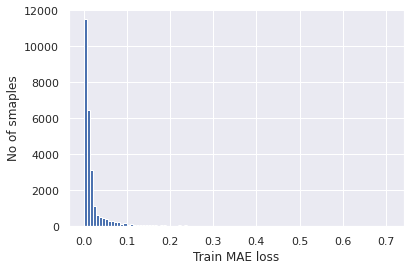

Reconstruction error threshold:  0.705741980713786
27
----------------------------------


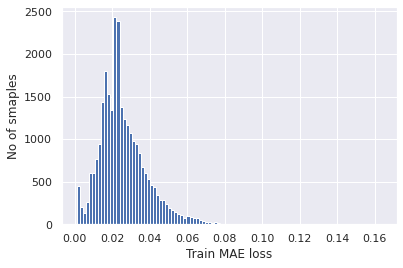

Reconstruction error threshold:  0.1636188141313299
28
----------------------------------


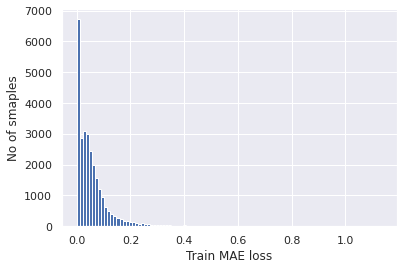

Reconstruction error threshold:  1.133928424785589
29
----------------------------------


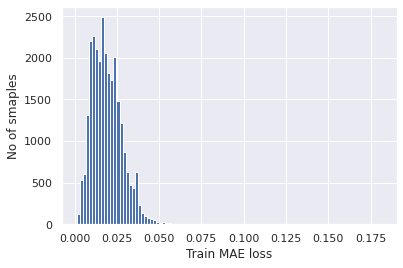

Reconstruction error threshold:  0.1813271535251658
30
----------------------------------


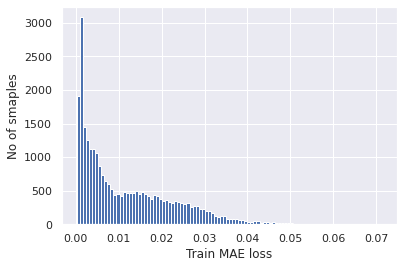

Reconstruction error threshold:  0.07118736210709542
31
----------------------------------


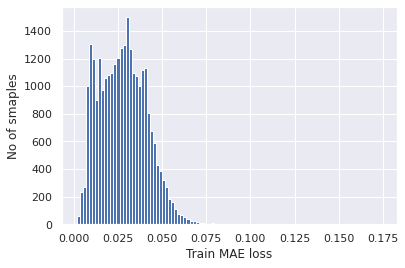

Reconstruction error threshold:  0.1741046396298655
32
----------------------------------


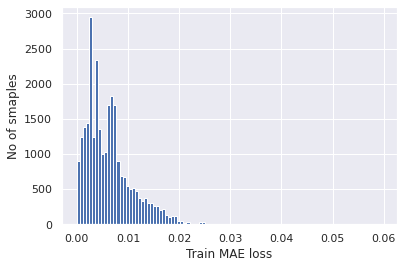

Reconstruction error threshold:  0.059513522748199335
33
----------------------------------


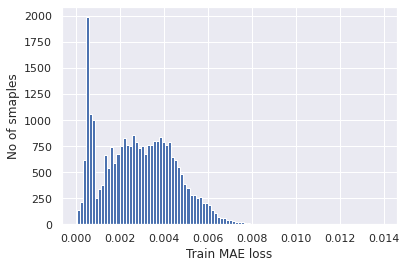

Reconstruction error threshold:  0.013887929940147578
34
----------------------------------


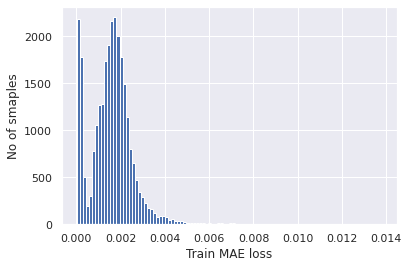

Reconstruction error threshold:  0.013776379029832718
35
----------------------------------


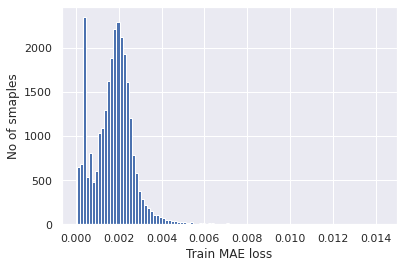

Reconstruction error threshold:  0.014241404520811848
36
----------------------------------


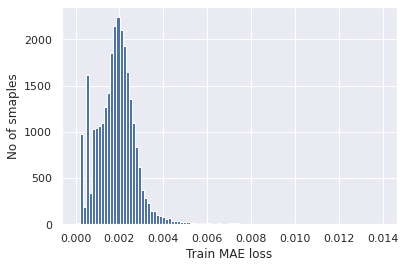

Reconstruction error threshold:  0.013942405423048695
37
----------------------------------


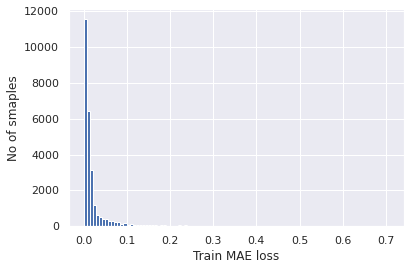

Reconstruction error threshold:  0.7056935780169381
38
----------------------------------


Reconstruction error threshold:  1.1339369901593077
39
----------------------------------


Reconstruction error threshold:  0.07114748846238583


In [64]:
for i in range(0,train_mae_loss.shape[0]):
    print(i)
    print('----------------------------------')
    plt.hist(train_mae_loss[i], bins=100)
    plt.xlabel('Train MAE loss')
    plt.ylabel('No of smaples')
    plt.show()
    
    threshold = np.max(train_mae_loss[i])
    print('Reconstruction error threshold: ', threshold)

In [62]:
#Finding Anomalies
X_test_pred = my_model.predict(X_test)
#mae = Mean Absolute Error
test_mae_loss = np.mean(np.abs(X_test_pred - X_test), axis =1)
test_mae_loss = np.transpose(test_mae_loss)
test_mae_loss.shape

(40, 6948)

0
----------------------------------


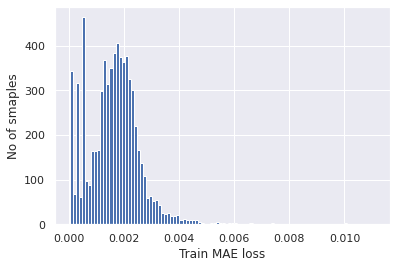

Reconstruction error threshold:  0.011080828563627465
1
----------------------------------


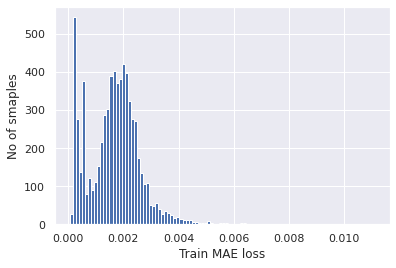

Reconstruction error threshold:  0.011084007871131063
2
----------------------------------


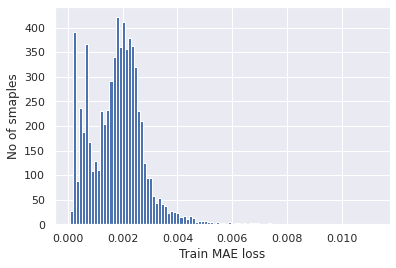

Reconstruction error threshold:  0.011184191294199453
3
----------------------------------


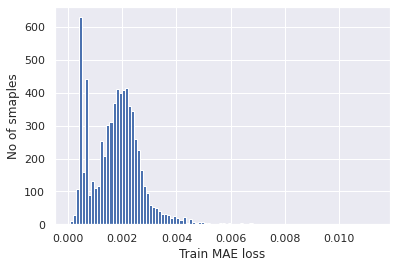

Reconstruction error threshold:  0.011316669663329282
4
----------------------------------


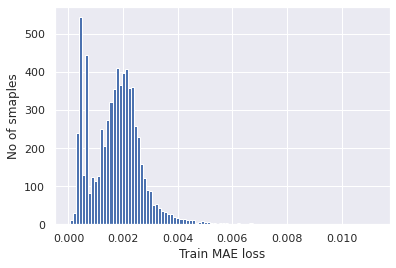

Reconstruction error threshold:  0.011191433258539663
5
----------------------------------


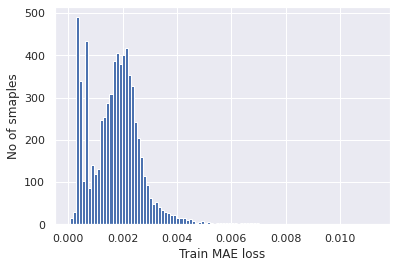

Reconstruction error threshold:  0.011259682650196001
6
----------------------------------


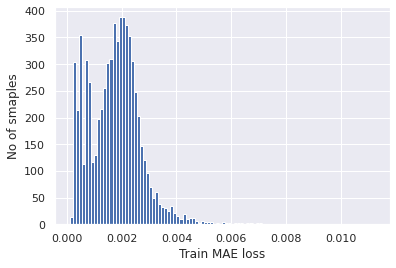

Reconstruction error threshold:  0.011212671560017984
7
----------------------------------


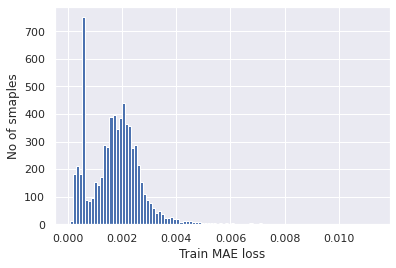

Reconstruction error threshold:  0.011300048243968408
8
----------------------------------


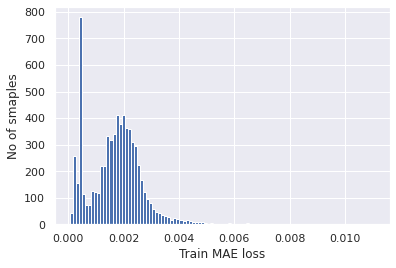

Reconstruction error threshold:  0.011045845188385472
9
----------------------------------


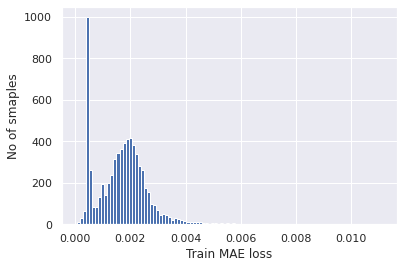

Reconstruction error threshold:  0.011095307115115804
10
----------------------------------


Reconstruction error threshold:  0.011361243587701242
11
----------------------------------


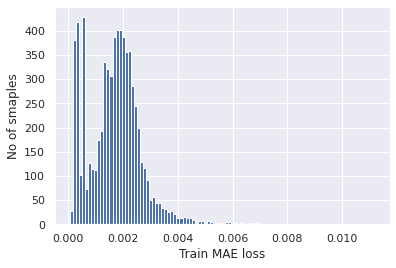

Reconstruction error threshold:  0.011165511862692101
12
----------------------------------


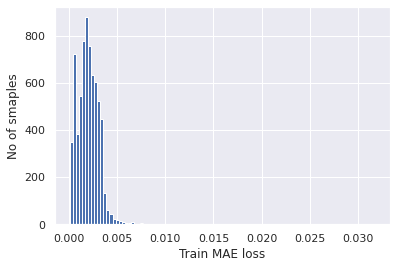

Reconstruction error threshold:  0.03173465526546804
13
----------------------------------


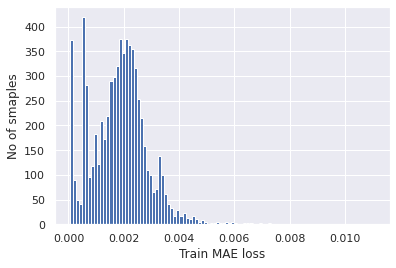

Reconstruction error threshold:  0.01105684222832376
14
----------------------------------


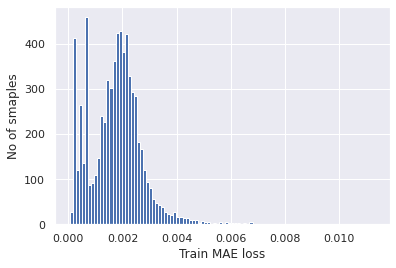

Reconstruction error threshold:  0.011314703321003483
15
----------------------------------


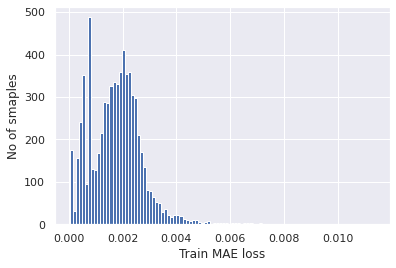

Reconstruction error threshold:  0.011367648699638778
16
----------------------------------


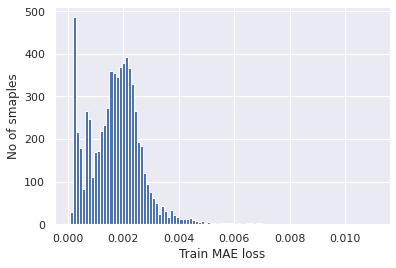

Reconstruction error threshold:  0.01105064067794953
17
----------------------------------


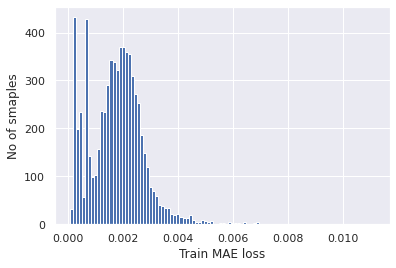

Reconstruction error threshold:  0.011134877148666067
18
----------------------------------


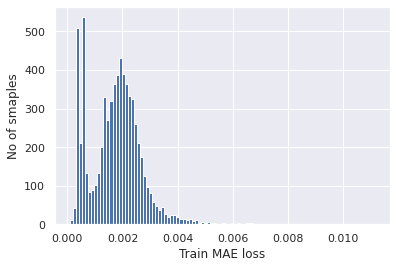

Reconstruction error threshold:  0.011139968786041843
19
----------------------------------


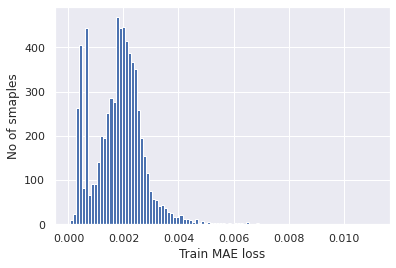

Reconstruction error threshold:  0.011118597208574998
20
----------------------------------


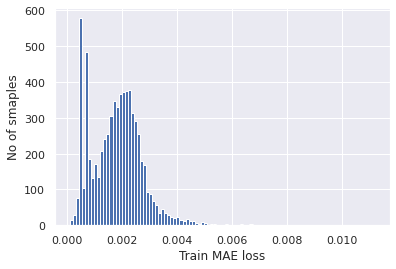

Reconstruction error threshold:  0.01116584921220748
21
----------------------------------


Reconstruction error threshold:  0.01127868825534789
22
----------------------------------


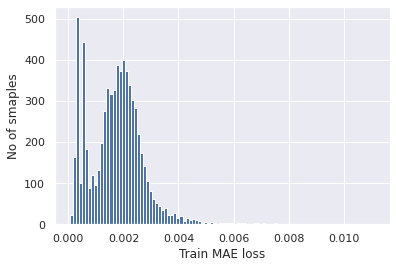

Reconstruction error threshold:  0.011115042455679403
23
----------------------------------


Reconstruction error threshold:  0.011047794969136958
24
----------------------------------


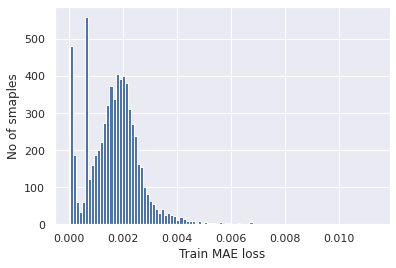

Reconstruction error threshold:  0.011300774675576608
25
----------------------------------


Reconstruction error threshold:  0.011026981565751715
26
----------------------------------


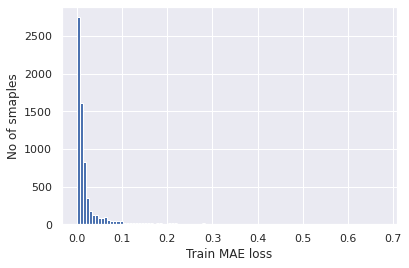

Reconstruction error threshold:  0.6731885861088496
27
----------------------------------


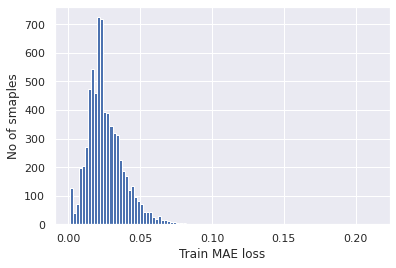

Reconstruction error threshold:  0.21292914063509588
28
----------------------------------


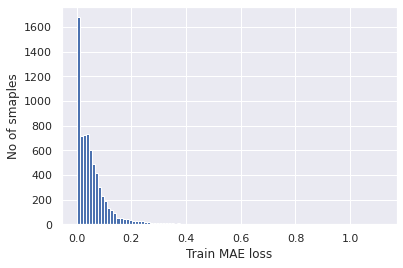

Reconstruction error threshold:  1.1136386233269326
29
----------------------------------


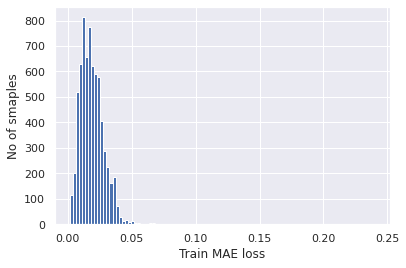

Reconstruction error threshold:  0.23970614074992208
30
----------------------------------


Reconstruction error threshold:  0.07118445444185803
31
----------------------------------


Reconstruction error threshold:  0.20001534000729532
32
----------------------------------


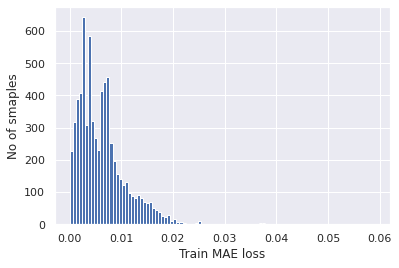

Reconstruction error threshold:  0.05894866941485742
33
----------------------------------


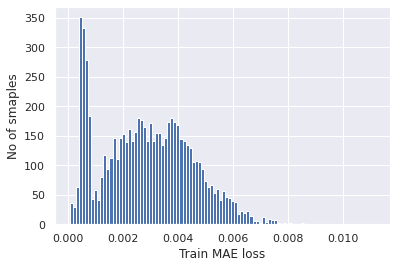

Reconstruction error threshold:  0.011125208856135146
34
----------------------------------


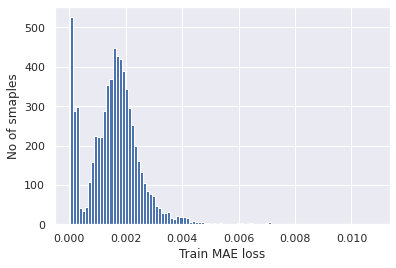

Reconstruction error threshold:  0.010807733584933733
35
----------------------------------


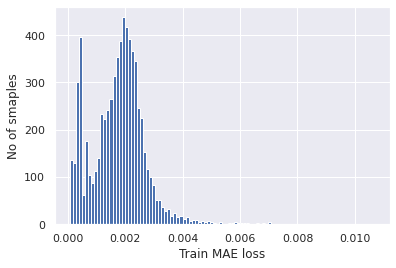

Reconstruction error threshold:  0.010675606756540536
36
----------------------------------


Reconstruction error threshold:  0.010561235784625214
37
----------------------------------


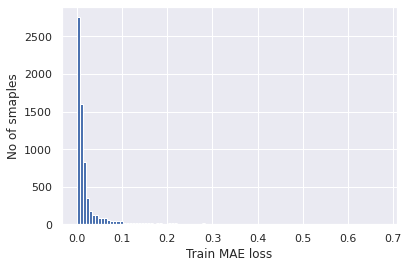

Reconstruction error threshold:  0.6732562113036376
38
----------------------------------


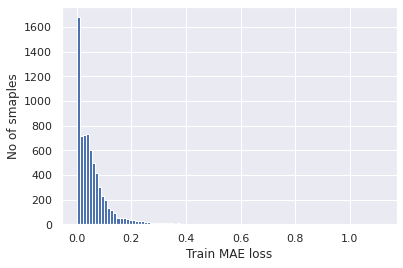

Reconstruction error threshold:  1.1147093220501296
39
----------------------------------


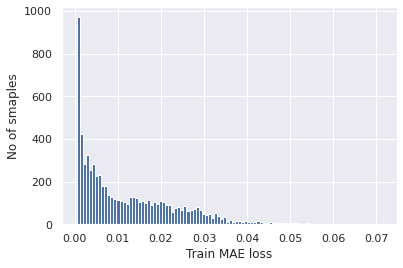

Reconstruction error threshold:  0.07114172908742497


In [65]:
for i in range(0,test_mae_loss.shape[0]):
    print(i)
    print('----------------------------------')
    plt.hist(test_mae_loss[i], bins=100)
    plt.xlabel('Train MAE loss')
    plt.ylabel('No of smaples')
    plt.show()
    
    threshold = np.max(test_mae_loss[i])
    print('Reconstruction error threshold: ', threshold)

# graph

In [81]:
import pandas as pd

df_d = pd.read_excel('/home/ubuntu/tutorial_kyg/koiiadata/N_DIGITAL_DATA.xlsx')

In [83]:
df_a = []
for i in range(1):
#     name = '/mnt/d/김유겸/weAI/koiia산업현장경진대회/20191206~20191208/N_ANALOG_DATA_ETC_01_000'+str(i+1)+'.xlsx'
    name = '/home/ubuntu/tutorial_kyg/koiiadata/N_ANALOG_DATA_ETC_01_0039.xlsx'
    df_a.append(pd.read_excel(name))
    print(i+1)

1


# 디지털데이터

In [88]:
df_d

seq                 dm_code         create_time  \
0      11924128  ETC-01-0010-DA-21-0192 2019-12-06 00:21:26   
1      11924129  ETC-01-0010-DA-21-0192 2019-12-06 00:21:27   
2      11924130  ETC-01-0024-DA-21-0482 2019-12-06 00:21:28   
3      11924131  ETC-01-0024-DA-21-0482 2019-12-06 00:21:40   
4      11924132  ETC-01-0024-DA-21-0482 2019-12-06 00:21:54   
...         ...                     ...                 ...   
57267  12032202  ETC-01-0035-DA-21-0742 2019-12-08 17:02:07   
57268  12032203  ETC-01-0029-DA-21-0621 2019-12-08 17:02:20   
57269  12032204  ETC-01-0029-DA-21-0589 2019-12-08 17:02:24   
57270  12032205  ETC-01-0029-DA-21-0621 2019-12-08 17:02:25   
57271  12032206  ETC-01-0021-DA-21-0399 2019-12-08 17:06:51   

                  insert_time  status  value  
0     2019-12-06 00:21:27.123       0      1  
1     2019-12-06 00:21:28.123       0      0  
2     2019-12-06 00:21:29.106       0      1  
3     2019-12-06 00:21:41.076       0      0  
4     2019-12-06 00:21:55.060       0      1  
...                       ...     ...    ...  
57267 2019-12-08 17:02:08.190       0      0  
57268 2019-12-08 17:02:21.143       0      1  
57269 2019-12-08 17:02:25.160       0      0  
57270 2019-12-08 17:02:26.126       0      0  
57271 2019-12-08 17:06:51.380       0      1  

[57272 rows x 6 columns]

In [86]:
# dm_code 종류 오름차순
dm_codes = sorted(list(set(df_d['dm_code'])))

In [87]:
# 오류 코드별 분류
groupbydm = dict()
for i in dm_codes:
    groupbydm[i] = df_d[df_d['dm_code']==i]

### 중복 제거

In [89]:
dup_iloc = dict()
for i in dm_codes:
    temp = []
    for j in range(1,len(groupbydm[i])):
        if groupbydm[i].iloc[j-1]['value'] == groupbydm[i].iloc[j]['value']:
            temp.append(j)
    dup_iloc[i] = temp

print(len(dup_iloc['ETC-01-0004-DA-21-0078']))
print(dup_iloc['ETC-01-0029-DA-21-0621'])

81
[3]


In [90]:
groupbydm_ = dict()
temp = []
for i in dm_codes:
    for j in dup_iloc[i]:
        temp.append(groupbydm[i].iloc[j-1].name)
    groupbydm_[i] = groupbydm[i].drop(temp)
    temp = []

In [91]:
display(groupbydm['ETC-01-0004-DA-21-0078'].iloc[1205:1215])
display(groupbydm_['ETC-01-0004-DA-21-0078'].iloc[1205:1215])

seq                 dm_code         create_time  \
1803  11926981  ETC-01-0004-DA-21-0078 2019-12-06 01:12:33   
1804  11926982  ETC-01-0004-DA-21-0078 2019-12-06 01:12:34   
1805  11926983  ETC-01-0004-DA-21-0078 2019-12-06 01:12:35   
1806  11926986  ETC-01-0004-DA-21-0078 2019-12-06 01:12:39   
1809  11926989  ETC-01-0004-DA-21-0078 2019-12-06 01:12:41   
1810  11926990  ETC-01-0004-DA-21-0078 2019-12-06 01:12:43   
1813  11927009  ETC-01-0004-DA-21-0078 2019-12-06 01:12:49   
1814  11927012  ETC-01-0004-DA-21-0078 2019-12-06 01:12:50   
1815  11927014  ETC-01-0004-DA-21-0078 2019-12-06 01:12:51   
1816  11926997  ETC-01-0004-DA-21-0078 2019-12-06 01:12:52   

                 insert_time  status  value  
1803 2019-12-06 01:12:34.010       0      0  
1804 2019-12-06 01:12:35.010       0      1  
1805 2019-12-06 01:12:36.010       0      0  
1806 2019-12-06 01:12:39.993       0      1  
1809 2019-12-06 01:12:41.993       0      0  
1810 2019-12-06 01:12:43.980       0      1  
1813 2019-12-06 01:12:59.823       0      1  
1814 2019-12-06 01:13:00.853       0      0  
1815 2019-12-06 01:13:01.886       0      1  
1816 2019-12-06 01:12:53.980       0      1

seq                 dm_code         create_time  \
1803  11926981  ETC-01-0004-DA-21-0078 2019-12-06 01:12:33   
1804  11926982  ETC-01-0004-DA-21-0078 2019-12-06 01:12:34   
1805  11926983  ETC-01-0004-DA-21-0078 2019-12-06 01:12:35   
1806  11926986  ETC-01-0004-DA-21-0078 2019-12-06 01:12:39   
1809  11926989  ETC-01-0004-DA-21-0078 2019-12-06 01:12:41   
1813  11927009  ETC-01-0004-DA-21-0078 2019-12-06 01:12:49   
1814  11927012  ETC-01-0004-DA-21-0078 2019-12-06 01:12:50   
1816  11926997  ETC-01-0004-DA-21-0078 2019-12-06 01:12:52   
1817  11926998  ETC-01-0004-DA-21-0078 2019-12-06 01:12:53   
1818  11927001  ETC-01-0004-DA-21-0078 2019-12-06 01:12:56   

                 insert_time  status  value  
1803 2019-12-06 01:12:34.010       0      0  
1804 2019-12-06 01:12:35.010       0      1  
1805 2019-12-06 01:12:36.010       0      0  
1806 2019-12-06 01:12:39.993       0      1  
1809 2019-12-06 01:12:41.993       0      0  
1813 2019-12-06 01:12:59.823       0      1  
1814 2019-12-06 01:13:00.853       0      0  
1816 2019-12-06 01:12:53.980       0      1  
1817 2019-12-06 01:12:54.963       0      0  
1818 2019-12-06 01:12:57.963       0      1

### 처음 정지 처리

In [92]:
start1 = []
for i in dm_codes:
    if int(groupbydm_[i].head(1)['value']) == 0:
        start1.append(i)
        print(i)

ETC-01-0039-DA-21-0940


In [93]:
for i in start1:
    groupbydm_[i].drop(groupbydm_[i].head(1).index, inplace=True)

### 마지막 정지 처리

In [94]:
last1 = []
for i in dm_codes:
    if int(groupbydm_[i].tail(1)['value']) == 1:
        last1.append(i)
        print(i)

ETC-01-0017-DA-21-0336
ETC-01-0021-DA-21-0399
ETC-01-0039-DA-21-0940


In [95]:
for i in last1:
    display(i, groupbydm_[i].tail())

'ETC-01-0017-DA-21-0336'

seq                 dm_code         create_time  \
56794  12022514  ETC-01-0017-DA-21-0336 2019-12-07 05:46:29   
57180  12032109  ETC-01-0017-DA-21-0336 2019-12-08 13:33:27   
57181  12032110  ETC-01-0017-DA-21-0336 2019-12-08 13:33:28   
57182  12032111  ETC-01-0017-DA-21-0336 2019-12-08 13:33:29   
57252  12032182  ETC-01-0017-DA-21-0336 2019-12-08 13:56:09   

                  insert_time  status  value  
56794 2019-12-07 05:46:29.196       0      1  
57180 2019-12-08 13:33:28.030       0      0  
57181 2019-12-08 13:33:29.033       0      1  
57182 2019-12-08 13:33:30.033       0      0  
57252 2019-12-08 13:56:10.100       0      1

'ETC-01-0021-DA-21-0399'

seq                 dm_code         create_time  \
57129  12032058  ETC-01-0021-DA-21-0399 2019-12-08 10:45:32   
57131  12032060  ETC-01-0021-DA-21-0399 2019-12-08 10:46:44   
57271  12032206  ETC-01-0021-DA-21-0399 2019-12-08 17:06:51   

                  insert_time  status  value  
57129 2019-12-08 10:45:32.786       0      1  
57131 2019-12-08 10:46:44.570       0      0  
57271 2019-12-08 17:06:51.380       0      1

'ETC-01-0039-DA-21-0940'

seq                 dm_code         create_time  \
57225  12032154  ETC-01-0039-DA-21-0940 2019-12-08 13:47:10   
57227  12032156  ETC-01-0039-DA-21-0940 2019-12-08 13:47:16   
57229  12032159  ETC-01-0039-DA-21-0940 2019-12-08 13:47:28   
57233  12032162  ETC-01-0039-DA-21-0940 2019-12-08 13:48:37   
57235  12032164  ETC-01-0039-DA-21-0940 2019-12-08 13:48:50   

                  insert_time  status  value  
57225 2019-12-08 13:47:10.620       0      1  
57227 2019-12-08 13:47:17.590       0      0  
57229 2019-12-08 13:47:29.606       0      1  
57233 2019-12-08 13:48:38.373       0      0  
57235 2019-12-08 13:48:51.326       0      1

In [96]:
for i in last1:
    groupbydm_[i].drop(groupbydm_[i].tail(1).index, inplace=True)

### 설비 정지 시간소요

In [97]:
# df_stop에 시작 시간에 맞춘 time_lapse 기록
df_stop = dict()
for i in dm_codes:
#     print(i)
    time_lapse = []
    for j in range(0, len(groupbydm_[i]), 2):
#         print(i, j)
        time_lapse.append(groupbydm_[i].iloc[j+1]['create_time'] - groupbydm_[i].iloc[j]['create_time'])
    df_stop[i] = groupbydm_[i][::2].copy()
    df_stop[i]['time_lapse'] = time_lapse

In [98]:
# checking
i = dm_codes[2]
display(groupbydm_[i])
display(df_stop[i])

seq                 dm_code         create_time  \
12207  11943852  ETC-01-0001-DA-21-0012 2019-12-06 06:19:19   
12210  11943856  ETC-01-0001-DA-21-0012 2019-12-06 06:19:23   
19654  11955655  ETC-01-0001-DA-21-0012 2019-12-06 10:47:11   
19655  11955656  ETC-01-0001-DA-21-0012 2019-12-06 10:47:15   

                  insert_time  status  value  
12207 2019-12-06 06:19:19.626       0      1  
12210 2019-12-06 06:19:23.610       0      0  
19654 2019-12-06 10:47:12.680       0      1  
19655 2019-12-06 10:47:16.660       0      0

seq                 dm_code         create_time  \
12207  11943852  ETC-01-0001-DA-21-0012 2019-12-06 06:19:19   
19654  11955655  ETC-01-0001-DA-21-0012 2019-12-06 10:47:11   

                  insert_time  status  value      time_lapse  
12207 2019-12-06 06:19:19.626       0      1 0 days 00:00:04  
19654 2019-12-06 10:47:12.680       0      1 0 days 00:00:04

In [99]:
for i in dm_codes:
    df_stop[i]['finish_time'] = groupbydm_[i][::2]['create_time']

In [100]:
# 각각 오류코드별 중지시간 분포 (초, startidx 조절)
import matplotlib.pyplot as plt

dm_times = dict()
for i in dm_codes:
    dm_times[i] = list(df_stop[i]['time_lapse'].dt.total_seconds())

labels, data = list(dm_times.keys()), list(dm_times.values())

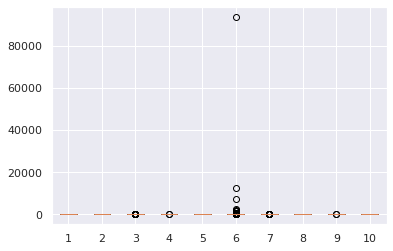

160 :  ETC-01-0038-DA-21-0927  ->  1
161 :  ETC-01-0038-DA-21-0932  ->  1
162 :  ETC-01-0039-DA-21-0936  ->  4185
163 :  ETC-01-0039-DA-21-0937  ->  23
164 :  ETC-01-0039-DA-21-0938  ->  2
165 :  ETC-01-0039-DA-21-0940  ->  4184
166 :  ETC-01-0039-DA-21-0942  ->  654
167 :  ETC-01-0039-DA-21-0947  ->  1
168 :  ETC-01-0039-DA-21-0950  ->  18
169 :  ETC-01-0039-DA-21-0952  ->  1
160 ~ 170 / 171


In [101]:
startidx = 160
plt.boxplot(data[startidx:startidx+10])
plt.show()
for i in range(startidx,startidx+10):
    print(i, ': ', dm_codes[i], ' -> ', len(df_stop[dm_codes[i]]))
print(startidx,'~',startidx+10,'/',len(dm_codes))

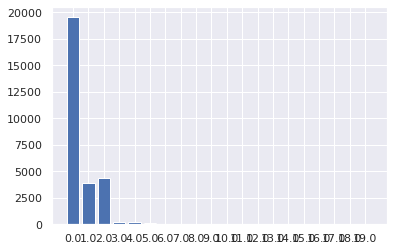

In [102]:
alldata = []
for i in data:
    for j in i:
        alldata.append(j)

datacount = dict()
for i in alldata:
    if i < 100:
        try:
            datacount[i//5] += 1
        except:
            datacount[i//5] = 1

datacount = sorted(datacount.items())
x, y = [], []
for i in datacount:
    x.append(i[0])
    y.append(i[1])

# print(x,y)
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)
plt.show()

In [103]:
# 총 순간정지 알람 횟수
check = 0
for i in dm_codes:
    print(check, i,': ',len(df_stop[i]))
    check += 1

0 ETC-01-0001-DA-21-0003 :  2
1 ETC-01-0001-DA-21-0005 :  1
2 ETC-01-0001-DA-21-0012 :  2
3 ETC-01-0002-DA-21-0022 :  1
4 ETC-01-0002-DA-21-0024 :  1
5 ETC-01-0002-DA-21-0029 :  1
6 ETC-01-0002-DA-21-0030 :  3
7 ETC-01-0002-DA-21-0031 :  4
8 ETC-01-0002-DA-21-0033 :  2
9 ETC-01-0002-DA-21-0034 :  2
10 ETC-01-0003-DA-21-0045 :  1
11 ETC-01-0003-DA-21-0052 :  1
12 ETC-01-0003-DA-21-0054 :  5
13 ETC-01-0003-DA-21-0056 :  2
14 ETC-01-0004-DA-21-0060 :  1
15 ETC-01-0004-DA-21-0062 :  1
16 ETC-01-0004-DA-21-0074 :  1
17 ETC-01-0004-DA-21-0075 :  20
18 ETC-01-0004-DA-21-0078 :  18575
19 ETC-01-0005-DA-21-0080 :  2
20 ETC-01-0005-DA-21-0085 :  3
21 ETC-01-0005-DA-21-0087 :  2
22 ETC-01-0005-DA-21-0088 :  4
23 ETC-01-0005-DA-21-0089 :  2
24 ETC-01-0005-DA-21-0095 :  2
25 ETC-01-0005-DA-21-0102 :  1
26 ETC-01-0005-DA-21-0103 :  2
27 ETC-01-0006-DA-21-0104 :  1
28 ETC-01-0006-DA-21-0109 :  2
29 ETC-01-0006-DA-21-0111 :  2
30 ETC-01-0007-DA-21-0123 :  2
31 ETC-01-0007-DA-21-0124 :  1
32 ETC-01-000

In [285]:
ls_summary = []
for i in dm_codes:
    ls_summary.append([df_stop[i]['dm_code'][:11],
                       df_stop[i]['dm_code'][12:],
                       d


'ETC-01-0010'

### 통신 이상인 경우 특이 사항 없는 듯 보임

In [104]:
df_d[df_d['status']==1]

seq                 dm_code         create_time  \
7119   11935668  ETC-01-0004-DA-21-0078 2019-12-06 03:42:36   
23195  11960091  ETC-01-0004-DA-21-0078 2019-12-06 12:20:30   
31344  11973312  ETC-01-0037-DA-21-0877 2019-12-06 17:03:33   
31673  11973883  ETC-01-0004-DA-21-0078 2019-12-06 17:11:49   
32788  11975877  ETC-01-0039-DA-21-0936 2019-12-06 17:39:58   
32807  11975909  ETC-01-0004-DA-21-0078 2019-12-06 17:40:18   
34978  11979497  ETC-01-0039-DA-21-0936 2019-12-06 19:02:54   
39174  11986496  ETC-01-0037-DA-21-0877 2019-12-06 21:00:00   
40861  11989354  ETC-01-0004-DA-21-0078 2019-12-06 21:44:47   
55030  12019140  ETC-01-0004-DA-21-0078 2019-12-07 04:59:14   

                  insert_time  status  value  
7119  2019-12-06 03:42:37.476       1      1  
23195 2019-12-06 12:20:31.270       1      0  
31344 2019-12-06 17:03:34.173       1      1  
31673 2019-12-06 17:11:49.773       1      1  
32788 2019-12-06 17:39:58.830       1      0  
32807 2019-12-06 17:40:18.813       1      0  
34978 2019-12-06 19:02:55.073       1      0  
39174 2019-12-06 21:00:00.413       1      1  
40861 2019-12-06 21:44:47.446       1      1  
55030 2019-12-07 04:59:15.223       1      1

# 아날로그17

In [328]:
# 빈 컬럼 제거
df_a17.dropna(inplace=True)
df_a17_ = df_a17.loc[:,(df_a17 != 0).any(axis=0)]
df_a17_

seq       e_code         create_time             insert_time  \
0       708326486  ETC-01-0017 2019-12-06 00:00:00 2019-12-09 16:40:03.826   
1       708326524  ETC-01-0017 2019-12-06 00:00:01 2019-12-09 16:40:03.826   
2       708326554  ETC-01-0017 2019-12-06 00:00:02 2019-12-09 16:40:03.826   
3       708326595  ETC-01-0017 2019-12-06 00:00:03 2019-12-09 16:40:03.826   
4       708326622  ETC-01-0017 2019-12-06 00:00:04 2019-12-09 16:40:03.826   
...           ...          ...                 ...                     ...   
259171  718438780  ETC-01-0017 2019-12-08 23:59:55 2019-12-09 16:40:03.826   
259172  718438812  ETC-01-0017 2019-12-08 23:59:56 2019-12-09 16:40:03.826   
259173  718438851  ETC-01-0017 2019-12-08 23:59:57 2019-12-09 16:40:03.826   
259174  718438910  ETC-01-0017 2019-12-08 23:59:58 2019-12-09 16:40:03.826   
259175  718438929  ETC-01-0017 2019-12-08 23:59:59 2019-12-09 16:40:03.826   

        op_start  op_end  op_result  cycle_time   d15  d16  d17  d18  d20  \
0              0       0          0       133.0  17.0  2.0  6.0  8.0  3.0   
1              0       0          0       133.0  17.0  2.0  6.0  8.0  3.0   
2              0       0          0       133.0  17.0  2.0  6.0  8.0  3.0   
3              0       0          0       133.0  17.0  2.0  6.0  8.0  3.0   
4              0       0          0       133.0  17.0  2.0  6.0  8.0  3.0   
...          ...     ...        ...         ...   ...  ...  ...  ...  ...   
259171         1       0          0       134.0  18.0  2.0  7.0  9.0  4.0   
259172         1       0          0       134.0  18.0  2.0  7.0  9.0  4.0   
259173         1       0          0       134.0  18.0  2.0  7.0  9.0  4.0   
259174         1       0          0       134.0  18.0  2.0  7.0  9.0  4.0   
259175         1       0          0       134.0  18.0  2.0  7.0  9.0  4.0   

        d21  d22  
0       3.0  6.0  
1       3.0  6.0  
2       3.0  6.0  
3       3.0  6.0  
4       3.0  6.0  
...     ...  ...  
259171  4.0  0.0  
259172  4.0  0.0  
259173  4.0  0.0  
259174  4.0  0.0  
259175  4.0  0.0  

[259160 rows x 15 columns]

In [329]:
# 불량 row
df_a17_.loc[(df_a17_['op_result']==0) & (df_a17_['op_end']==1),:]

seq       e_code         create_time             insert_time  \
24736  709291428  ETC-01-0017 2019-12-06 06:52:18 2019-12-09 16:40:03.826   

       op_start  op_end  op_result  cycle_time   d15  d16  d17  d18  d20  d21  \
24736         0       1          0       139.0  17.0  2.0  6.0  8.0  3.0  3.0   

       d22  
24736  6.0

In [248]:
# 기존 알고리즘으로 하면 문제가 없음
for i in range(1,len(df_a17_)):
    if df_a17_.iloc[i-1]['op_start']==0 and df_a17_.iloc[i]['op_end']==1:
        print(i,':가동 없이 종료 찍힘')
    if df_a17_.iloc[i-1]['op_start']==1 and df_a17_.iloc[i]['op_start']==0 and df_a17_.iloc[i]['op_end']==0:
        print(i,':가동 후 종료 안찍힘')

20626 :가동 없이 종료 찍힘
27045 :가동 후 종료 안찍힘
27046 :가동 없이 종료 찍힘
62478 :가동 후 종료 안찍힘
74920 :가동 후 종료 안찍힘
88566 :가동 후 종료 안찍힘
88567 :가동 없이 종료 찍힘
105597 :가동 후 종료 안찍힘


In [404]:
# cycle time
cycle = []
for i in range(1,len(df_a17_)):
    if df_a17_.iloc[i]['cycle_time'] != df_a17_.iloc[i-1]['cycle_time']:
        cycle.append(df_a17_.iloc[i-1]['cycle_time'])

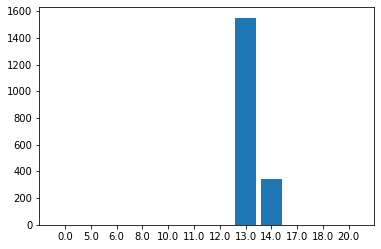

In [405]:
cyclecount = dict()
for i in cycle:
    try:
        cyclecount[i//10] += 1
    except:
        cyclecount[i//10] = 1
cyclecount = sorted(cyclecount.items())
x, y = [], []
for i in cyclecount:
    x.append(i[0])
    y.append(i[1])
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)
plt.show()

### corr

In [440]:
# 아이템별 자르기
working = []
ls = []
for i, s in df_a17_.iterrows():
#     print(i)
    if s['op_start'] == 1:
        ls.append(list(s.iloc[8:]))
    if s['op_end'] == 1:
        ls.insert(0,s['op_result'])
        working.append(ls)
        ls = []

In [442]:
st = set()
for i in working:
    st.add(len(i))
print(st)

{32, 1, 2, 33, 35, 6, 9, 11, 12, 13, 14, 15, 16, 18, 31}


In [443]:
working_ = [i for i in working if len(i)>=14 and len(i)<16]
print(len(working),len(working_))

4164 4131


In [444]:
for i in working_:
    del i[14:]

In [453]:
ls_corr = []
for i in working_:
    ls = []
    ls.append(i[0])
    for j in range(1, len(i)):
        for k in i[j]:
            ls.append(k)
    ls_corr.append(ls)

df_corr = pd.DataFrame(ls_corr)
df_corr

0     1    2    3    4    5    6    7     8    9   ...   82   83   84  \
0      1  17.0  2.0  6.0  8.0  3.0  3.0  6.0  17.0  2.0  ...  3.0  4.0  5.0   
1      1  17.0  2.0  7.0  9.0  3.0  4.0  5.0  17.0  2.0  ...  4.0  3.0  5.0   
2      1  17.0  2.0  7.0  9.0  3.0  3.0  5.0  17.0  2.0  ...  3.0  4.0  5.0   
3      1  17.0  2.0  6.0  9.0  3.0  4.0  5.0  17.0  2.0  ...  3.0  3.0  5.0   
4      1  17.0  2.0  7.0  9.0  3.0  4.0  5.0  17.0  2.0  ...  3.0  4.0  5.0   
...   ..   ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...  ...  ...   
4126   1  17.0  2.0  7.0  9.0  3.0  4.0  6.0  17.0  2.0  ...  3.0  4.0  6.0   
4127   1  17.0  2.0  7.0  9.0  3.0  4.0  6.0  17.0  2.0  ...  3.0  4.0  6.0   
4128   1  17.0  2.0  7.0  9.0  3.0  4.0  6.0  17.0  2.0  ...  3.0  4.0  6.0   
4129   1  17.0  2.0  7.0  9.0  3.0  4.0  6.0  17.0  2.0  ...  3.0  4.0  6.0   
4130   1  17.0  2.0  7.0  9.0  3.0  4.0  6.0  17.0  2.0  ...  3.0  4.0  6.0   

        85   86   87   88   89   90   91  
0     17.0  2.0  7.0  9.0  3.0  4.0  5.0  
1     17.0  2.0  6.0  8.0  4.0  3.0  5.0  
2     17.0  2.0  7.0  9.0  3.0  4.0  5.0  
3     17.0  2.0  6.0  8.0  3.0  3.0  5.0  
4     17.0  2.0  7.0  9.0  3.0  4.0  5.0  
...    ...  ...  ...  ...  ...  ...  ...  
4126  17.0  2.0  7.0  9.0  3.0  4.0  6.0  
4127  17.0  2.0  7.0  9.0  3.0  4.0  6.0  
4128  17.0  2.0  7.0  9.0  3.0  4.0  6.0  
4129  17.0  2.0  7.0  9.0  3.0  4.0  6.0  
4130  17.0  2.0  7.0  9.0  3.0  4.0  6.0  

[4131 rows x 92 columns]

In [472]:
corr = []
ls = []
check = 0
for i in df_corr.corrwith(df_corr[0])[1:]:
    check += 1
    ls.append(i)
    if check == 7:
        corr.append(ls)
        ls = []
        check = 0

corr = pd.DataFrame(corr)
corr

0         1         2         3         4         5         6
0  -0.004862 -0.002952  0.011768  0.016666  0.004147  0.017865 -0.012926
1  -0.004858 -0.002912  0.011817  0.016682  0.004139  0.017918 -0.012974
2  -0.004862 -0.002919  0.011817  0.016617  0.004115  0.017927 -0.012987
3  -0.004904 -0.003011  0.011798  0.016633  0.004131  0.017936 -0.013096
4  -0.004854 -0.002983  0.011786  0.016658  0.004172  0.017865 -0.013047
5  -0.004950 -0.002940  0.011743  0.016682  0.004196  0.017910 -0.013059
6  -0.005031 -0.002963  0.011712  0.016625  0.004196  0.017883 -0.013041
7  -0.004904 -0.002987  0.011743  0.016577  0.004131  0.017865 -0.013065
8  -0.004868 -0.002922  0.011688  0.016512  0.004172  0.017918 -0.013065
9  -0.004861 -0.002953  0.011725  0.016577  0.004236  0.017865 -0.013071
10 -0.004904 -0.003013  0.011755  0.016569  0.004180  0.017857 -0.013102
11 -0.004858 -0.002973  0.011749  0.016529  0.004139  0.017848 -0.013114
12 -0.004890 -0.003015  0.011669  0.016561  0.004147  0.017954 -0.013078

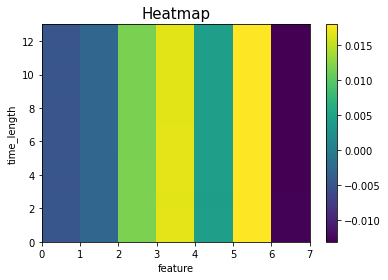

In [473]:
# heatmap
plt.pcolor(corr)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.title('Heatmap', fontsize=15)
plt.xlabel('feature', fontsize=10)
plt.ylabel('time_length', fontsize=10)
plt.colorbar()
plt.show()

# 아날로그

In [105]:
for i in range(len(df_a)):
    print(type(df_a[i]))

<class 'pandas.core.frame.DataFrame'>


In [106]:
# 불량 개수
for i in range(len(df_a)):
    print(i,': ',len(df_a[i].loc[(df_a[i]['op_result']==0) & (df_a[i]['op_end']==1),:]))

0 :  12


In [110]:
n = 0

In [111]:
# 빈 컬럼 제거
df_ = df_a[n].dropna()
df_ = df_.loc[:,(df_ != 0).any(axis=0)]
display(df_)
print(len(df_a[n])-len(df_))

seq       e_code         create_time             insert_time  \
0       708326459  ETC-01-0039 2019-12-06 00:00:00 2019-12-09 16:52:08.143   
1       708326498  ETC-01-0039 2019-12-06 00:00:01 2019-12-09 16:52:08.143   
2       708326537  ETC-01-0039 2019-12-06 00:00:02 2019-12-09 16:52:08.143   
3       708326576  ETC-01-0039 2019-12-06 00:00:03 2019-12-09 16:52:08.143   
4       708326615  ETC-01-0039 2019-12-06 00:00:04 2019-12-09 16:52:08.143   
...           ...          ...                 ...                     ...   
259157  718438766  ETC-01-0039 2019-12-08 23:59:55 2019-12-09 16:52:08.143   
259158  718438805  ETC-01-0039 2019-12-08 23:59:56 2019-12-09 16:52:08.143   
259159  718438844  ETC-01-0039 2019-12-08 23:59:57 2019-12-09 16:52:08.143   
259160  718438883  ETC-01-0039 2019-12-08 23:59:58 2019-12-09 16:52:08.143   
259161  718438922  ETC-01-0039 2019-12-08 23:59:59 2019-12-09 16:52:08.143   

        op_start  op_end  op_result  cycle_time  d15  d16  d18  d19  d20  d21  
0              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
1              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
2              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
3              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
4              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
...          ...     ...        ...         ...  ...  ...  ...  ...  ...  ...  
259157         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259158         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259159         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259160         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259161         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  

[259131 rows x 14 columns]

31


In [112]:
print(list(df_.loc[(df_['op_result']==0) & (df_['op_end']==1),:]['seq']))

[709406239, 709407253, 711055035, 711056079, 711356466, 711680024, 711681155, 711872813, 711943315, 712093667, 712411459, 713005141]


In [113]:
# 불량 row
df_.loc[(df_['op_result']==0) & (df_['op_end']==1),:]

seq       e_code         create_time             insert_time  \
27678   709406239  ETC-01-0039 2019-12-06 07:41:21 2019-12-09 16:52:08.143   
27704   709407253  ETC-01-0039 2019-12-06 07:41:47 2019-12-09 16:52:08.143   
69908   711055035  ETC-01-0039 2019-12-06 19:25:15 2019-12-09 16:52:08.143   
69934   711056079  ETC-01-0039 2019-12-06 19:25:41 2019-12-09 16:52:08.143   
77635   711356466  ETC-01-0039 2019-12-06 21:34:02 2019-12-09 16:52:08.143   
85925   711680024  ETC-01-0039 2019-12-06 23:52:14 2019-12-09 16:52:08.143   
85954   711681155  ETC-01-0039 2019-12-06 23:52:43 2019-12-09 16:52:08.143   
90868   711872813  ETC-01-0039 2019-12-07 01:14:37 2019-12-09 16:52:08.143   
92670   711943315  ETC-01-0039 2019-12-07 01:44:39 2019-12-09 16:52:08.143   
96524   712093667  ETC-01-0039 2019-12-07 02:48:54 2019-12-09 16:52:08.143   
104660  712411459  ETC-01-0039 2019-12-07 05:04:31 2019-12-09 16:52:08.143   
119870  713005141  ETC-01-0039 2019-12-07 09:18:02 2019-12-09 16:52:08.143   

        op_start  op_end  op_result  cycle_time   d15  d16  d18  d19   d20  \
27678          0       1          0        71.0   8.0  6.0  2.0  4.0  49.0   
27704          0       1          0        69.0   8.0  6.0  2.0  3.0  47.0   
69908          0       1          0        72.0   8.0  6.0  2.0  5.0   2.0   
69934          0       1          0        72.0   8.0  6.0  2.0  5.0   2.0   
77635          0       1          0        72.0   8.0  7.0  2.0  5.0   2.0   
85925          0       1          0        74.0   9.0  7.0  2.0  5.0   2.0   
85954          0       1          0        71.0   9.0  6.0  2.0  5.0   2.0   
90868          0       1          0        95.0   8.0  7.0  2.0  5.0   2.0   
92670          0       1          0        95.0   8.0  7.0  2.0  5.0   2.0   
96524          0       1          0        93.0   8.0  6.0  2.0  5.0   2.0   
104660         0       1          0        94.0   8.0  6.0  1.0  5.0   2.0   
119870         0       1          0        94.0  10.0  6.0  2.0  5.0   2.0   

        d21  
27678   1.0  
27704   1.0  
69908   1.0  
69934   1.0  
77635   1.0  
85925   1.0  
85954   1.0  
90868   1.0  
92670   1.0  
96524   1.0  
104660  1.0  
119870  1.0

In [120]:
# cycle time
cycle = []
for i in range(len(df_)):
    if df_.iloc[i]['op_end'] != 1:
        cycle.append(df_.iloc[i]['cycle_time'])

In [121]:
import matplotlib.pyplot as plt

cyclecount = dict()
for i in cycle:
    try:
        cyclecount[i//10] += 1
    except:
        cyclecount[i//10] = 1
cyclecount = sorted(cyclecount.items())
x, y = [], []
for i in cyclecount:
    x.append(i[0])
    y.append(i[1])
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)

plt.show()

print(x)
print(y)

[0.0, 5.0, 6.0, 7.0, 9.0, 11.0, 12.0]
[42443, 171, 74, 255, 317, 205643, 6035]


### 양품 여부 corr

In [205]:
df_

seq       e_code         create_time             insert_time  \
0       708326459  ETC-01-0039 2019-12-06 00:00:00 2019-12-09 16:52:08.143   
1       708326498  ETC-01-0039 2019-12-06 00:00:01 2019-12-09 16:52:08.143   
2       708326537  ETC-01-0039 2019-12-06 00:00:02 2019-12-09 16:52:08.143   
3       708326576  ETC-01-0039 2019-12-06 00:00:03 2019-12-09 16:52:08.143   
4       708326615  ETC-01-0039 2019-12-06 00:00:04 2019-12-09 16:52:08.143   
...           ...          ...                 ...                     ...   
259157  718438766  ETC-01-0039 2019-12-08 23:59:55 2019-12-09 16:52:08.143   
259158  718438805  ETC-01-0039 2019-12-08 23:59:56 2019-12-09 16:52:08.143   
259159  718438844  ETC-01-0039 2019-12-08 23:59:57 2019-12-09 16:52:08.143   
259160  718438883  ETC-01-0039 2019-12-08 23:59:58 2019-12-09 16:52:08.143   
259161  718438922  ETC-01-0039 2019-12-08 23:59:59 2019-12-09 16:52:08.143   

        op_start  op_end  op_result  cycle_time  d15  d16  d18  d19  d20  d21  
0              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
1              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
2              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
3              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
4              0       0          0       117.0  9.0  6.0  2.0  4.0  2.0  1.0  
...          ...     ...        ...         ...  ...  ...  ...  ...  ...  ...  
259157         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259158         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259159         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259160         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  
259161         0       0          0         0.0  9.0  0.0  2.0  0.0  2.0  1.0  

[259131 rows x 14 columns]

In [206]:
# 아이템별 자르기
working = []
ls = []
for i, s in df_.iterrows():
#     print(i)
    if s['op_start'] == 1:
        ls.append(list(s.iloc[8:])) # status column 유무 확인(있으면 7, 없으면 8)
    if s['op_end'] == 1:
        ls.insert(0,s['op_result'])
        working.append(ls)
        ls = []

In [57]:
realcycle = []
for i in working:
    realcycle.append(len(i)-1)
realcyclecount = dict()
for i in realcycle:
    try:
        realcyclecount[i] += 1
    except:
        realcyclecount[i] = 1

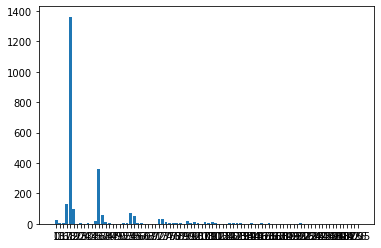

[0, 13, 16, 17, 18, 19, 20, 23, 24, 30, 34, 35, 36, 37, 38, 39, 47, 49, 50, 52, 53, 54, 55, 56, 57, 60, 63, 69, 71, 72, 73, 74, 75, 76, 77, 87, 89, 90, 91, 92, 93, 107, 108, 109, 110, 111, 113, 123, 124, 126, 127, 128, 129, 133, 139, 144, 145, 146, 147, 163, 165, 166, 167, 168, 184, 187, 196, 198, 199, 202, 216, 222, 234, 236, 241, 242, 244, 259, 300, 320, 368, 394, 482, 1075, 1426, 2005]
[22, 2, 2, 128, 1362, 96, 1, 3, 1, 2, 1, 17, 362, 57, 12, 2, 1, 1, 1, 2, 5, 71, 54, 7, 2, 1, 1, 1, 1, 34, 29, 9, 2, 2, 2, 2, 1, 19, 8, 9, 6, 1, 11, 7, 12, 3, 1, 1, 1, 7, 2, 4, 3, 1, 1, 5, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [58]:
# print(realcyclecount)
realcyclecount = sorted(realcyclecount.items())
x, y = [], []
for i in realcyclecount:
    x.append(i[0])
    y.append(i[1])
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)

plt.show()

print(x)
print(y)

In [134]:
working_ = [i for i in working if len(i)>=18 and len(i)<20] # 길이 설정
print(len(working),len(working_))

2438 1490


In [135]:
for i in working_:
    del i[18:] # 뒷부분 자르기

In [505]:
ls_corr = []
for i in working_:
    ls = []
    ls.append(i[0])
    for j in range(1, len(i)):
        for k in i[j]:
            ls.append(k)
    ls_corr.append(ls)

df_corr = pd.DataFrame(ls_corr)
df_corr

0    1     2     3    4    5    6     7     8    9    ...  382  383  \
0       1  1.0  22.0  12.0  6.0  8.0  3.0  10.0   9.0  6.0  ...  2.0  1.0   
1       1  1.0  22.0  12.0  6.0  9.0  3.0   9.0   9.0  6.0  ...  2.0  1.0   
2       1  1.0  21.0  11.0  6.0  9.0  3.0   9.0  10.0  6.0  ...  2.0  1.0   
3       0  1.0  22.0  12.0  6.0  9.0  2.0   9.0   9.0  6.0  ...  2.0  1.0   
4       1  2.0  21.0   0.0  0.0  9.0  0.0   9.0  10.0  0.0  ...  2.0  1.0   
...   ...  ...   ...   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...   
1485    1  2.0  22.0  12.0  6.0  9.0  3.0  10.0   9.0  5.0  ...  2.0  1.0   
1486    1  2.0  22.0  12.0  6.0  9.0  3.0  10.0   9.0  5.0  ...  2.0  2.0   
1487    1  2.0  21.0  11.0  6.0  8.0  2.0   9.0   9.0  6.0  ...  2.0  1.0   
1488    1  2.0  22.0  12.0  6.0  9.0  2.0   9.0   9.0  6.0  ...  2.0  1.0   
1489    1  2.0  22.0  12.0  6.0  8.0  2.0   9.0   9.0  6.0  ...  2.0  2.0   

      384  385  386  387  388  389  390  391  
0     5.0  5.0  5.0  6.0  5.0  2.0  2.0  5.0  
1     5.0  5.0  5.0  6.0  5.0  2.0  2.0  5.0  
2     4.0  4.0  5.0  6.0  4.0  2.0  2.0  5.0  
3     4.0  5.0  5.0  6.0  4.0  2.0  2.0  5.0  
4     4.0  0.0  0.0  6.0  5.0  2.0  2.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
1485  5.0  5.0  4.0  6.0  5.0  1.0  3.0  5.0  
1486  4.0  5.0  5.0  6.0  4.0  2.0  2.0  5.0  
1487  5.0  5.0  5.0  5.0  5.0  1.0  2.0  5.0  
1488  4.0  5.0  5.0  6.0  5.0  1.0  2.0  5.0  
1489  4.0  4.0  5.0  6.0  5.0  2.0  2.0  5.0  

[1490 rows x 392 columns]

In [511]:
corr = []
ls = []
check = 0
for i in df_corr.corrwith(df_corr[0])[1:]:
    check += 1
    ls.append(i)
    if check == 23: # feature 개수
        corr.append(ls)
        ls = []
        check = 0

corr = pd.DataFrame(corr)
corr

0         1         2         3         4         5         6   \
0   0.067856  0.025332  0.097176  0.074527 -0.002489  0.044991  0.040365   
1   0.067856  0.025332  0.097111  0.074453 -0.002489  0.044991  0.040365   
2   0.067980  0.025332  0.097111  0.074453 -0.002489  0.044991  0.040365   
3   0.067980  0.025332  0.097111  0.074453 -0.002489  0.044991  0.040365   
4   0.067980  0.025332  0.097111  0.074527 -0.002489  0.044991  0.040365   
5   0.068103  0.025332  0.097111  0.074527 -0.002489  0.044991  0.040365   
6   0.068227  0.025208  0.097111  0.074527 -0.002489  0.044991  0.040365   
7   0.068227  0.025208  0.097111  0.074453 -0.002489  0.044991  0.040365   
8   0.068227  0.025208  0.097111  0.074453 -0.017858  0.044991  0.040365   
9   0.068227  0.025208  0.097111  0.074453  0.009798  0.044991  0.040365   
10  0.068227  0.025208  0.097111  0.074453  0.009798  0.044991  0.040365   
11  0.068227  0.025208  0.097111  0.074453  0.009798  0.044845  0.040365   
12  0.068227  0.025208  0.097111  0.074453  0.009798  0.027256  0.017320   
13  0.068227  0.025208  0.097111  0.016761  0.009798  0.021775  0.051853   
14  0.068227  0.025208  0.097111  0.005599  0.009798  0.021775  0.052143   
15  0.068227  0.009065  0.097111  0.006643  0.009798  0.021775  0.052143   
16  0.068227  0.036584  0.097111  0.007283  0.009798  0.021775  0.052143   

          7         8         9   ...        13        14        15        16  \
0   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
1   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
2   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
3   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
4   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
5   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
6   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.003928  0.059983   
7   0.040093  0.068846 -0.035371  ...  0.101030  0.042485  0.060715  0.059983   
8   0.040093  0.068846 -0.035371  ...  0.101030  0.040851  0.047630  0.059983   
9  -0.007446  0.068846 -0.035371  ...  0.101030  0.021186  0.047630  0.059983   
10 -0.030859  0.068846  0.025253  ...  0.101030  0.020704  0.047630  0.059983   
11 -0.030859  0.068455  0.059460  ...  0.101030  0.020704  0.047630  0.059983   
12 -0.030859  0.091196  0.059460  ...  0.101030  0.020704  0.047630  0.059983   
13 -0.030859  0.041492  0.059460  ...  0.101030  0.020704  0.047630  0.059983   
14 -0.030859  0.041492 -0.024957  ...  0.101030  0.020704  0.047630  0.059983   
15 -0.030859  0.041492 -0.075029  ...  0.032167  0.020704  0.047630  0.059983   
16 -0.030859  0.020575 -0.075029  ... -0.010608  0.020704  0.047630  0.059983   

         17        18        19        20        21        22  
0   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
1   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
2   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
3   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
4   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
5   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
6   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
7   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
8   0.08918 -0.015304  0.030734 -0.031225 -0.011665  0.073659  
9   0.08918 -0.015304  0.073409 -0.031225 -0.011665  0.073659  
10  0.08918 -0.015304  0.063994 -0.031225 -0.011950  0.073659  
11  0.08918 -0.033551  0.063994 -0.031225  0.023857  0.073659  
12  0.08918 -0.033714  0.063994 -0.031225  0.023857  0.073659  
13  0.08918 -0.033714  0.063994 -0.031225  0.023857  0.073659  
14  0.08918 -0.033714  0.063994 -0.031225  0.023857  0.073659  
15  0.08918 -0.033714  0.063994 -0.035218  0.023857  0.073659  
16  0.08918 -0.033714  0.063994 -0.042337  0.023857  0.027713  

[17 rows x 23 columns]

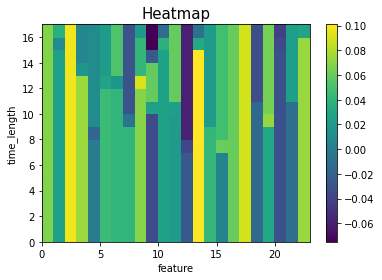

In [512]:
# heatmap
plt.pcolor(corr)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
name = 'Heatmap of ' + str(n)
plt.title('Heatmap', fontsize=15)
plt.xlabel('feature', fontsize=10)
plt.ylabel('time_length', fontsize=10)
plt.colorbar()
plt.show()

### 양품-불량품 corr

In [180]:
defect_features = [i for i in working_ if i[0] == 0]
print(len(defect_features))
fair_features = [i for i in working_ if i[0] == 1]
print(len(fair_features))

21
1469


In [181]:
ls_defect = []
for i in defect_features:
    ls = []
    for j in range(1, len(i)):
        for k in i[j]:
            ls.append(k)
    ls_defect.append(ls)

df_defect = pd.DataFrame(ls_defect)
df_defect

0     1     2    3    4    5     6    7    8     9    ...  381  382  383  \
0   1.0  22.0  12.0  6.0  9.0  2.0   9.0  9.0  6.0  13.0  ...  2.0  1.0  4.0   
1   1.0  22.0  12.0  6.0  8.0  3.0  10.0  9.0  6.0  13.0  ...  2.0  1.0  4.0   
2   1.0  21.0  12.0  7.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
3   1.0  22.0  12.0  6.0  9.0  3.0  10.0  8.0  5.0  12.0  ...  2.0  1.0  4.0   
4   1.0  21.0  11.0  6.0  8.0  3.0   9.0  9.0  6.0  11.0  ...  2.0  1.0  4.0   
5   1.0  22.0  12.0  6.0  8.0  2.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
6   1.0  21.0  12.0  7.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  2.0  4.0   
7   1.0  21.0  11.0  6.0  9.0  2.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
8   1.0  22.0  12.0  6.0  9.0  2.0   9.0  9.0  5.0  12.0  ...  2.0  1.0  4.0   
9   1.0  22.0  12.0  6.0  9.0  2.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
10  1.0  22.0  12.0  6.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
11  1.0  22.0  12.0  6.0  9.0  3.0  10.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
12  1.0  21.0  11.0  6.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  2.0  4.0   
13  1.0  21.0  11.0  6.0  9.0  2.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  4.0   
14  1.0  21.0  12.0  6.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  2.0  4.0   
15  1.0  21.0  11.0  7.0  9.0  2.0   9.0  9.0  6.0  13.0  ...  2.0  1.0  4.0   
16  1.0  22.0   0.0  0.0  9.0  0.0  10.0  9.0  0.0  13.0  ...  2.0  1.0  5.0   
17  1.0  21.0  11.0  6.0  9.0  2.0   9.0  9.0  6.0  12.0  ...  2.0  1.0  5.0   
18  1.0  21.0   0.0  0.0  9.0  0.0   9.0  9.0  0.0  12.0  ...  2.0  1.0  4.0   
19  1.0  21.0  12.0  7.0  9.0  3.0   9.0  9.0  6.0  13.0  ...  2.0  2.0  5.0   
20  1.0  21.0  12.0  7.0  9.0  3.0   9.0  9.0  6.0  12.0  ...  2.0  2.0  4.0   

    384  385  386  387  388  389  390  
0   5.0  5.0  6.0  4.0  2.0  2.0  5.0  
1   5.0  4.0  6.0  4.0  2.0  2.0  5.0  
2   5.0  5.0  6.0  4.0  2.0  2.0  5.0  
3   5.0  5.0  6.0  4.0  2.0  2.0  5.0  
4   5.0  5.0  6.0  4.0  1.0  2.0  5.0  
5   4.0  5.0  6.0  4.0  2.0  2.0  6.0  
6   5.0  5.0  6.0  5.0  2.0  2.0  5.0  
7   5.0  5.0  6.0  4.0  2.0  2.0  5.0  
8   4.0  5.0  6.0  4.0  2.0  2.0  5.0  
9   4.0  5.0  6.0  4.0  2.0  2.0  5.0  
10  4.0  5.0  6.0  5.0  2.0  2.0  5.0  
11  5.0  4.0  6.0  4.0  2.0  2.0  5.0  
12  4.0  5.0  6.0  5.0  2.0  2.0  5.0  
13  4.0  5.0  5.0  5.0  1.0  2.0  5.0  
14  5.0  5.0  6.0  4.0  1.0  2.0  5.0  
15  5.0  5.0  6.0  4.0  2.0  3.0  5.0  
16  0.0  0.0  6.0  5.0  2.0  2.0  0.0  
17  4.0  5.0  6.0  5.0  2.0  2.0  6.0  
18  0.0  0.0  6.0  4.0  2.0  2.0  6.0  
19  5.0  5.0  6.0  5.0  2.0  2.0  5.0  
20  5.0  5.0  6.0  4.0  2.0  2.0  6.0  

[21 rows x 391 columns]

In [182]:
ls_fair = []
for i in fair_features:
    ls = []
    for j in range(1, len(i)):
        for k in i[j]:
            ls.append(k)
    ls_fair.append(ls)

df_fair = pd.DataFrame(ls_fair)
df_fair

0     1     2    3    4    5     6     7    8     9    ...  381  382  \
0     1.0  22.0  12.0  6.0  8.0  3.0  10.0   9.0  6.0  12.0  ...  2.0  1.0   
1     1.0  22.0  12.0  6.0  9.0  3.0   9.0   9.0  6.0  12.0  ...  2.0  1.0   
2     1.0  21.0  11.0  6.0  9.0  3.0   9.0  10.0  6.0  12.0  ...  2.0  1.0   
3     2.0  21.0   0.0  0.0  9.0  0.0   9.0  10.0  0.0  13.0  ...  2.0  1.0   
4     2.0  22.0   0.0  0.0  9.0  0.0   9.0   9.0  0.0  13.0  ...  2.0  1.0   
...   ...   ...   ...  ...  ...  ...   ...   ...  ...   ...  ...  ...  ...   
1464  2.0  22.0  12.0  6.0  9.0  3.0  10.0   9.0  5.0  12.0  ...  2.0  1.0   
1465  2.0  22.0  12.0  6.0  9.0  3.0  10.0   9.0  5.0  12.0  ...  2.0  2.0   
1466  2.0  21.0  11.0  6.0  8.0  2.0   9.0   9.0  6.0  12.0  ...  2.0  1.0   
1467  2.0  22.0  12.0  6.0  9.0  2.0   9.0   9.0  6.0  12.0  ...  2.0  1.0   
1468  2.0  22.0  12.0  6.0  8.0  2.0   9.0   9.0  6.0  12.0  ...  2.0  2.0   

      383  384  385  386  387  388  389  390  
0     5.0  5.0  5.0  6.0  5.0  2.0  2.0  5.0  
1     5.0  5.0  5.0  6.0  5.0  2.0  2.0  5.0  
2     4.0  4.0  5.0  6.0  4.0  2.0  2.0  5.0  
3     4.0  0.0  0.0  6.0  5.0  2.0  2.0  0.0  
4     5.0  0.0  0.0  5.0  5.0  1.0  3.0  5.0  
...   ...  ...  ...  ...  ...  ...  ...  ...  
1464  5.0  5.0  4.0  6.0  5.0  1.0  3.0  5.0  
1465  4.0  5.0  5.0  6.0  4.0  2.0  2.0  5.0  
1466  5.0  5.0  5.0  5.0  5.0  1.0  2.0  5.0  
1467  4.0  5.0  5.0  6.0  5.0  1.0  2.0  5.0  
1468  4.0  4.0  5.0  6.0  5.0  2.0  2.0  5.0  

[1469 rows x 391 columns]

In [183]:
dia = []
ls = []
check = 0
for i in df_defect.corrwith(df_fair):
    check += 1
    ls.append(i)
    if check == 23: # feature 개수
        dia.append(ls)
        ls = []
        check = 0

dia = pd.DataFrame(dia)
dia

0         1         2         3         4         5         6         7   \
0  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
1  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
2  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
3  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
4  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
5  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
6  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
7  NaN  0.175035 -0.094947 -0.115563  0.148522 -0.034086 -0.085749 -0.547723   
8  NaN  0.175035 -0.094947 -0.115563  0.331133 -0.034086 -0.085749 -0.547723   
9  NaN  0.175035 -0.094947 -0.115563 -0.108465 -0.034086 -0.085749 -0.072548   
10 NaN  0.175035 -0.094947 -0.115563 -0.108465 -0.034086 -0.085749 -0.105263   
11 NaN  0.175035 -0.094947 -0.115563 -0.108465 -0.034086 -0.085749 -0.105263   
12 NaN  0.175035 -0.094947 -0.115563 -0.108465  0.010336 -0.223607 -0.105263   
13 NaN  0.175035 -0.094947 -0.133045 -0.108465  0.067420  0.577350 -0.105263   
14 NaN  0.175035 -0.094947 -0.050000 -0.108465  0.067420  0.577350 -0.105263   
15 NaN  0.023125 -0.094947 -0.050000 -0.108465  0.067420  0.577350 -0.105263   
16 NaN  0.062017 -0.094947 -0.050000 -0.108465  0.067420  0.577350 -0.105263   

          8         9   ...        13            14        15        16  \
0  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
1  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
2  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
3  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
4  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
5  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
6  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.204124 -0.181462   
7  -0.086522 -0.452267  ... -0.182609 -2.403703e-17 -0.254514 -0.181462   
8  -0.086522 -0.452267  ... -0.182609  3.442652e-01 -0.428174 -0.181462   
9  -0.086522 -0.452267  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
10 -0.086522 -0.280976  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
11 -0.086522  0.234521  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
12  0.408998  0.234521  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
13  0.070014  0.234521  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
14  0.070014 -0.032275  ... -0.182609  1.414214e-01 -0.428174 -0.181462   
15  0.070014  0.069338  ... -0.104583  1.414214e-01 -0.428174 -0.181462   
16 -0.038348  0.069338  ...       NaN  1.414214e-01 -0.428174 -0.181462   

          17        18            19        20        21        22  
0  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
1  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
2  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
3  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
4  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
5  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
6  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
7  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
8  -0.159111 -0.132453  6.741999e-02 -0.085749 -0.132453 -0.080296  
9  -0.159111 -0.132453 -4.654752e-17 -0.085749 -0.132453 -0.080296  
10 -0.159111 -0.132453 -7.905694e-02 -0.085749 -0.166667 -0.080296  
11 -0.159111 -0.108465 -7.905694e-02 -0.085749 -0.091287 -0.080296  
12 -0.159111 -0.091287 -7.905694e-02 -0.085749 -0.091287 -0.080296  
13 -0.159111 -0.091287 -7.905694e-02 -0.085749 -0.091287 -0.080296  
14 -0.159111 -0.091287 -7.905694e-02 -0.085749 -0.091287 -0.080296  
15 -0.159111 -0.091287 -7.905694e-02  0.118913 -0.091287 -0.080296  
16 -0.159111 -0.091287 -7.905694e-02  0

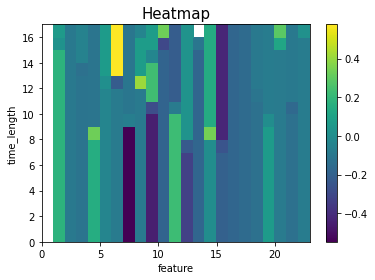

In [184]:
# heatmap
plt.pcolor(dia)
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
name = 'Heatmap of ' + str(n)
plt.title('Heatmap', fontsize=15)
plt.xlabel('feature', fontsize=10)
plt.ylabel('time_length', fontsize=10)
plt.colorbar()
plt.show()

### 양품-양품 corr

In [233]:
fair_features = [i for i in working_ if i[0] == 1][::10]
print(len(fair_features))

147


In [250]:
fair_fair = []
for i in range(len(fair_features)):
    fair1 = pd.DataFrame(fair_features[i][1:])
    for j in range(i+1,len(fair_features)):
        fair2 = pd.DataFrame(fair_features[j][1:])
        fair_fair.append(list(fair1.corrwith(fair2)))

In [256]:
fair_fair

0    1   2         3   4   5    6   7   8         9   ...  13  \
0     NaN  NaN NaN  0.834523 NaN NaN  NaN NaN NaN       NaN  ... NaN   
1     NaN  NaN NaN  0.834523 NaN NaN  NaN NaN NaN       NaN  ... NaN   
2     NaN  NaN NaN  0.834523 NaN NaN  1.0 NaN NaN -0.256776  ... NaN   
3     NaN  NaN NaN       NaN NaN NaN  NaN NaN NaN       NaN  ... NaN   
4     NaN  NaN NaN  0.834523 NaN NaN -1.0 NaN NaN  0.460882  ... NaN   
...    ..  ...  ..       ...  ..  ..  ...  ..  ..       ...  ...  ..   
10726 NaN  NaN NaN       NaN NaN NaN  NaN NaN NaN       NaN  ... NaN   
10727 NaN -1.0 NaN       NaN NaN NaN  1.0 NaN NaN       NaN  ... NaN   
10728 NaN  NaN NaN  1.000000 NaN NaN  NaN NaN NaN       NaN  ... NaN   
10729 NaN  1.0 NaN  1.000000 NaN NaN  1.0 NaN NaN       NaN  ... NaN   
10730 NaN  NaN NaN  1.000000 NaN NaN  NaN NaN NaN       NaN  ... NaN   

             14        15  16  17        18        19        20  21  22  
0     -0.888889       NaN NaN NaN       NaN       NaN       NaN NaN NaN  
1           NaN -1.000000 NaN NaN -1.000000       NaN       NaN NaN NaN  
2           NaN       NaN NaN NaN  0.874007       NaN       NaN NaN NaN  
3      0.888889       NaN NaN NaN       NaN -1.000000       NaN NaN NaN  
4           NaN       NaN NaN NaN       NaN       NaN       NaN NaN NaN  
...         ...       ...  ..  ..       ...       ...       ...  ..  ..  
10726  1.000000 -1.000000 NaN NaN       NaN       NaN -1.000000 NaN NaN  
10727       NaN  0.887412 NaN NaN       NaN       NaN  0.684653 NaN NaN  
10728       NaN -1.000000 NaN NaN       NaN -0.887412       NaN NaN NaN  
10729       NaN  0.887412 NaN NaN       NaN  1.000000       NaN NaN NaN  
10730       NaN -0.887412 NaN NaN       NaN -0.887412 -0.684653 NaN NaN  

[10731 rows x 23 columns]

In [255]:
fair_fair = pd.DataFrame(fair_fair)
list(fair_fair.mean())

[nan,
 -0.012939958549188614,
 nan,
 0.9627623281201434,
 0.07642276422764227,
 0.040300687780728345,
 0.012349896626932958,
 -0.03055658517584862,
 0.05798217709731699,
 0.2407374464741302,
 0.0388231849159793,
 -0.0014513788098693772,
 0.022514208034923704,
 -0.1315947570314806,
 0.03047025051906897,
 -0.009935710111046173,
 nan,
 nan,
 -0.02418207681365576,
 -0.01116159114031314,
 0.008788637143896412,
 -0.031753698191418274,
 -0.07692307692307693]

### 기타 확인사항

In [ ]:
# # 기존 알고리즘으로 하면 문제가 없음
# for i in range(1,len(df_)):
#     if df_.iloc[i-1]['op_start']==0 and df_.iloc[i]['op_end']==1:
#         print(i,':가동 없이 종료 찍힘')
#     if df_.iloc[i-1]['op_start']==1 and df_.iloc[i]['op_start']==0 and df_.iloc[i]['op_end']==0:
#         print(i,':가동 후 종료 안찍힘')

In [71]:
#사이클 변동 확인
cycletest = pd.DataFrame(realcycle)
cycletest['real'] = [i for i in cycle if i != 0][:2438]
# cycle[:2438]

In [72]:
cycletest

0   real
0      0  181.0
1     54  181.0
2     18  183.0
3     18  203.0
4     18  181.0
...   ..    ...
2433  18  181.0
2434  23  180.0
2435  18  181.0
2436  36  180.0
2437   0  182.0

[2438 rows x 2 columns]

# 순간정지 39

162 ETC-01-0039-DA-21-0936 :  4185   -> 가동이랑 똑같음

163 ETC-01-0039-DA-21-0937 :  23

164 ETC-01-0039-DA-21-0938 :  2

165 ETC-01-0039-DA-21-0940 :  4184   -> 가동이랑 반대임

166 ETC-01-0039-DA-21-0942 :  654

167 ETC-01-0039-DA-21-0947 :  1

168 ETC-01-0039-DA-21-0950 :  18

169 ETC-01-0039-DA-21-0952 :  1

170 ETC-01-0039-DA-21-0953 :  3

### all

In [250]:
df_39stop = df_stop[dm_codes[162]]
for i in range(163,171):
    df_39stop = df_39stop.append(df_stop[dm_codes[i]])

In [251]:
df_39stop.sort_index(inplace = True)

### 주기

In [252]:
errortime = []
for i in range(1,len(df_39stop)):
    errortime.append((df_39stop.iloc[i]['create_time']-df_39stop.iloc[i-1]['create_time']).total_seconds())

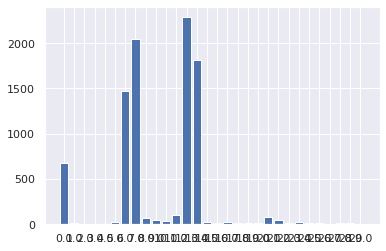

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0]
[681, 13, 4, 3, 3, 29, 1467, 2044, 74, 49, 33, 104, 2287, 1811, 20, 18, 20, 17, 16, 17, 85, 47, 17, 25, 16, 9, 7, 9, 9, 2]


In [253]:
import matplotlib.pyplot as plt

errortimecount = dict()
for i in errortime:
    try:
        errortimecount[i] += 1
    except:
        errortimecount[i] = 1
errortimecount = sorted(errortimecount.items())
x, y = [], []
for i in errortimecount:
    x.append(i[0])
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

In [237]:
import plotly.express as px

fig = px.box(errortime)
fig.show()

### 지속시간

In [276]:
timelapse = []
for i in range(1,len(df_39stop)):
    timelapse.append((df_39stop.iloc[i]['time_lapse']).total_seconds())

In [282]:
import matplotlib.pyplot as plt

timelapsecount = dict()
for i in timelapse:
    try:
        timelapsecount[i] += 1
    except:
        timelapsecount[i] = 1
timelapsecount = sorted(timelapsecount.items())
x, y = [], []
for i in timelapsecount:
    x.append(int(i[0]))
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[648, 4, 9, 6, 30, 1463, 2046, 83, 41, 40, 102, 2229, 1877, 20, 18, 20, 23, 22, 19, 85, 49, 17, 25, 18, 11, 7, 8, 9, 2, 9]


In [278]:
import plotly.express as px

fig = px.box(timelapse)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]


### gantt chart

In [226]:
df_a39 = df_a[0]

ls_t = []
ls_working = []

for i, s in df_a39.iterrows():
    if s['op_start'] == 1:
        ls_t.append(s['create_time'])
    if s['op_end'] == 1:
        if ls_t != []:
            ls_working.append(['working', ls_t[0], s['cycle_time']/10])
        ls_t = []
df_working = pd.DataFrame(ls_working, columns=['dm_code','create_time','time_lapse'])
df_working['time_lapse'] = pd.to_timedelta(df_working['time_lapse'], unit = 'S')

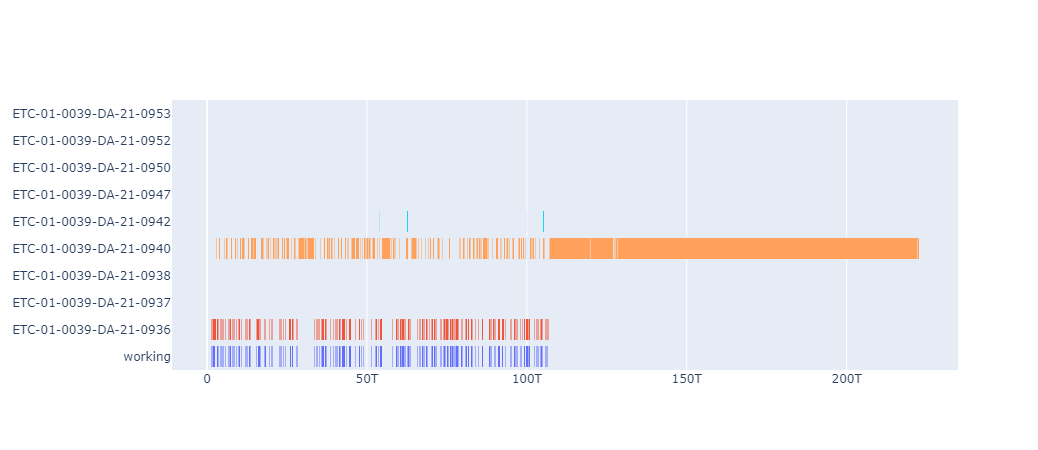

In [227]:
import plotly.graph_objects as go
import pandas as pd

starttime = df_a[0].loc[0,'create_time']

fig = go.Figure(
    layout = {
        'barmode': 'stack',
        'xaxis': {'automargin': True},
        'yaxis': {'automargin': True}}#, 'categoryorder': 'category ascending'}}
)

fig.add_bar(x=df_working.time_lapse,
        y=df_working.dm_code,
        base=df_working.create_time-starttime,
        orientation='h',
        showlegend=False,
        name='working')

for character, character_df in df_39stop.groupby('dm_code'):
    fig.add_bar(x=character_df.time_lapse,
                y=character_df.dm_code,
                base=character_df.create_time-starttime,
                orientation='h',
                showlegend=False,
                name=character)    
fig.show()

### each

In [254]:
i_error = 166

### 주기

In [255]:
errortime = []
for i in range(1,len(df_stop[dm_codes[i_error]])):
    errortime.append((df_stop[dm_codes[i_error]].iloc[i]['create_time']-df_stop[dm_codes[i_error]].iloc[i-1]['create_time']).total_seconds())

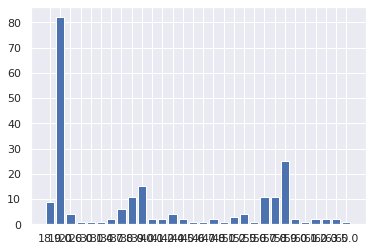

[18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
[9, 82, 4, 1, 1, 1, 2, 6, 11, 15, 2, 2, 4, 2, 1, 1, 2, 1, 3, 4, 1, 11, 11, 25, 2, 1, 2, 2, 2, 1]


In [256]:
import matplotlib.pyplot as plt

errortimecount = dict()
for i in errortime:
    try:
        errortimecount[i] += 1
    except:
        errortimecount[i] = 1
errortimecount = sorted(errortimecount.items())
x, y = [], []
for i in errortimecount:
    x.append(i[0])
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

In [258]:
import plotly.express as px

fig = px.box(errortime)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]


### 지속시간

In [270]:
timelapse = []
for i in range(1,len(df_stop[dm_codes[i_error]])):
    timelapse.append((df_stop[dm_codes[i_error]].iloc[i]['time_lapse']).total_seconds())

[1.0, 2.0, 3.0, 4.0]
[645, 4, 2, 2]


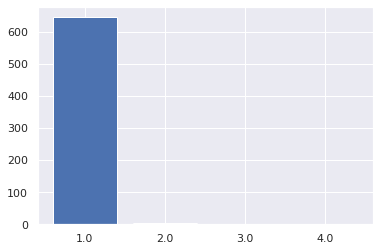

In [274]:
import matplotlib.pyplot as plt

timelapsecount = dict()
for i in timelapse:
    try:
        timelapsecount[i] += 1
    except:
        timelapsecount[i] = 1
timelapsecount = sorted(timelapsecount.items())
x, y = [], []
for i in timelapsecount:
    x.append(i[0])
    y.append(i[1])
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)

# plt.bar(range(30),y[:30])
# plt.xticks(range(30), x[:30])

# plt.show()

print(x[:30])
print(y[:30])

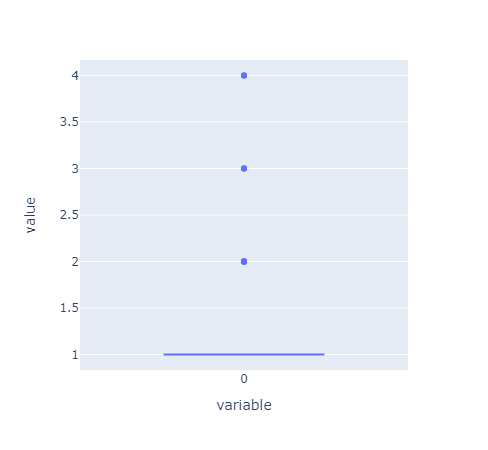

In [275]:
import plotly.express as px

fig = px.box(timelapse)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]


# 순간정지 39

162 ETC-01-0039-DA-21-0936 :  4185   -> 가동이랑 똑같음

163 ETC-01-0039-DA-21-0937 :  23

164 ETC-01-0039-DA-21-0938 :  2

165 ETC-01-0039-DA-21-0940 :  4184   -> 가동이랑 반대임

166 ETC-01-0039-DA-21-0942 :  654

167 ETC-01-0039-DA-21-0947 :  1

168 ETC-01-0039-DA-21-0950 :  18

169 ETC-01-0039-DA-21-0952 :  1

170 ETC-01-0039-DA-21-0953 :  3

### all

In [250]:
df_39stop = df_stop[dm_codes[162]]
for i in range(163,171):
    df_39stop = df_39stop.append(df_stop[dm_codes[i]])

In [251]:
df_39stop.sort_index(inplace = True)

### 주기

In [252]:
errortime = []
for i in range(1,len(df_39stop)):
    errortime.append((df_39stop.iloc[i]['create_time']-df_39stop.iloc[i-1]['create_time']).total_seconds())

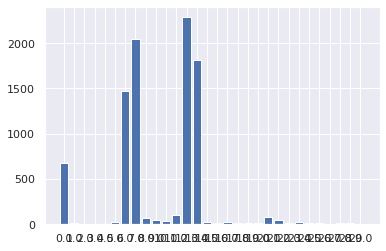

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0]
[681, 13, 4, 3, 3, 29, 1467, 2044, 74, 49, 33, 104, 2287, 1811, 20, 18, 20, 17, 16, 17, 85, 47, 17, 25, 16, 9, 7, 9, 9, 2]


In [253]:
import matplotlib.pyplot as plt

errortimecount = dict()
for i in errortime:
    try:
        errortimecount[i] += 1
    except:
        errortimecount[i] = 1
errortimecount = sorted(errortimecount.items())
x, y = [], []
for i in errortimecount:
    x.append(i[0])
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

In [237]:
import plotly.express as px

fig = px.box(errortime)
fig.show()

### 지속시간

In [276]:
timelapse = []
for i in range(1,len(df_39stop)):
    timelapse.append((df_39stop.iloc[i]['time_lapse']).total_seconds())

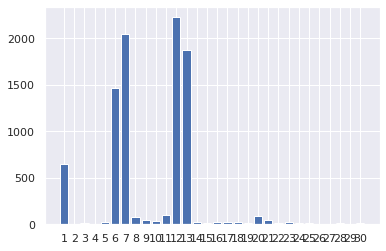

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[648, 4, 9, 6, 30, 1463, 2046, 83, 41, 40, 102, 2229, 1877, 20, 18, 20, 23, 22, 19, 85, 49, 17, 25, 18, 11, 7, 8, 9, 2, 9]


In [282]:
import matplotlib.pyplot as plt

timelapsecount = dict()
for i in timelapse:
    try:
        timelapsecount[i] += 1
    except:
        timelapsecount[i] = 1
timelapsecount = sorted(timelapsecount.items())
x, y = [], []
for i in timelapsecount:
    x.append(int(i[0]))
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

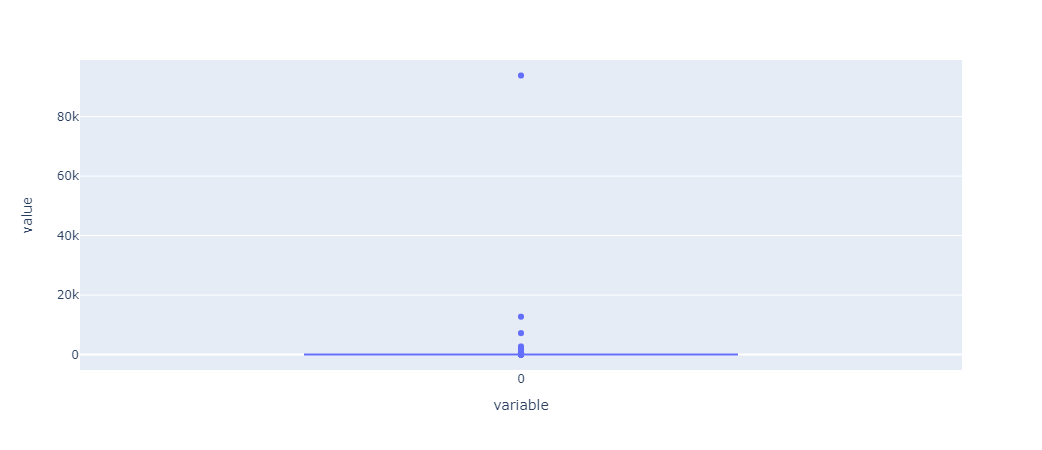

In [278]:
import plotly.express as px

fig = px.box(timelapse)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]


### gantt chart

In [226]:
df_a39 = df_a[0]

ls_t = []
ls_working = []

for i, s in df_a39.iterrows():
    if s['op_start'] == 1:
        ls_t.append(s['create_time'])
    if s['op_end'] == 1:
        if ls_t != []:
            ls_working.append(['working', ls_t[0], s['cycle_time']/10])
        ls_t = []
df_working = pd.DataFrame(ls_working, columns=['dm_code','create_time','time_lapse'])
df_working['time_lapse'] = pd.to_timedelta(df_working['time_lapse'], unit = 'S')

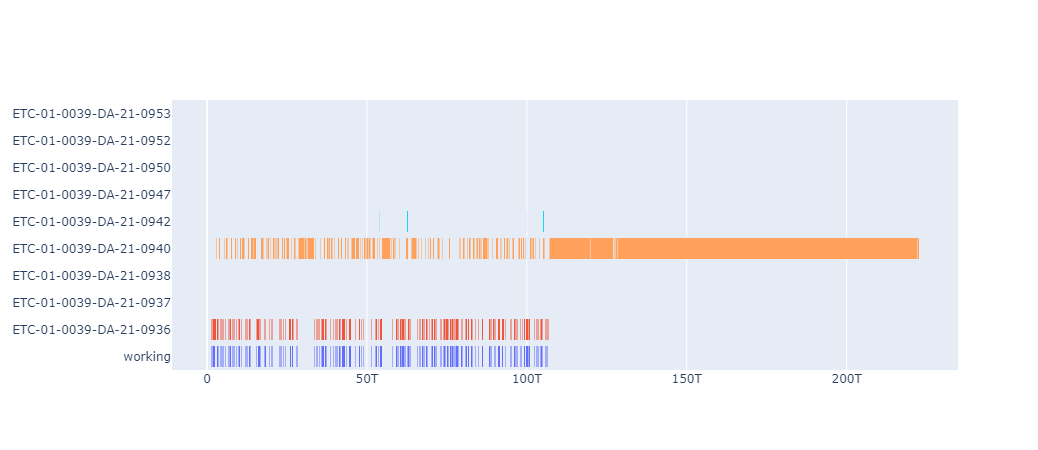

In [227]:
import plotly.graph_objects as go
import pandas as pd

starttime = df_a[0].loc[0,'create_time']

fig = go.Figure(
    layout = {
        'barmode': 'stack',
        'xaxis': {'automargin': True},
        'yaxis': {'automargin': True}}#, 'categoryorder': 'category ascending'}}
)

fig.add_bar(x=df_working.time_lapse,
        y=df_working.dm_code,
        base=df_working.create_time-starttime,
        orientation='h',
        showlegend=False,
        name='working')

for character, character_df in df_39stop.groupby('dm_code'):
    fig.add_bar(x=character_df.time_lapse,
                y=character_df.dm_code,
                base=character_df.create_time-starttime,
                orientation='h',
                showlegend=False,
                name=character)    
fig.show()

### each

In [254]:
i_error = 166

### 주기

In [255]:
errortime = []
for i in range(1,len(df_stop[dm_codes[i_error]])):
    errortime.append((df_stop[dm_codes[i_error]].iloc[i]['create_time']-df_stop[dm_codes[i_error]].iloc[i-1]['create_time']).total_seconds())

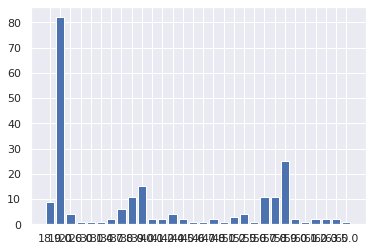

[18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
[9, 82, 4, 1, 1, 1, 2, 6, 11, 15, 2, 2, 4, 2, 1, 1, 2, 1, 3, 4, 1, 11, 11, 25, 2, 1, 2, 2, 2, 1]


In [256]:
import matplotlib.pyplot as plt

errortimecount = dict()
for i in errortime:
    try:
        errortimecount[i] += 1
    except:
        errortimecount[i] = 1
errortimecount = sorted(errortimecount.items())
x, y = [], []
for i in errortimecount:
    x.append(i[0])
    y.append(i[1])
# plt.bar(range(len(x)),y)
# plt.xticks(range(len(x)), x)

plt.bar(range(30),y[:30])
plt.xticks(range(30), x[:30])

plt.show()

print(x[:30])
print(y[:30])

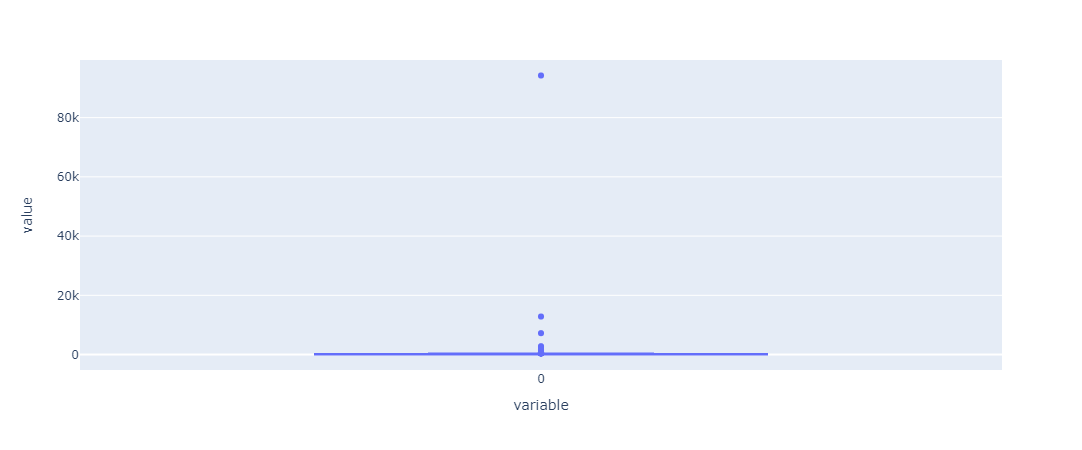

In [258]:
import plotly.express as px

fig = px.box(errortime)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]


### 지속시간

In [270]:
timelapse = []
for i in range(1,len(df_stop[dm_codes[i_error]])):
    timelapse.append((df_stop[dm_codes[i_error]].iloc[i]['time_lapse']).total_seconds())

[1.0, 2.0, 3.0, 4.0]
[645, 4, 2, 2]


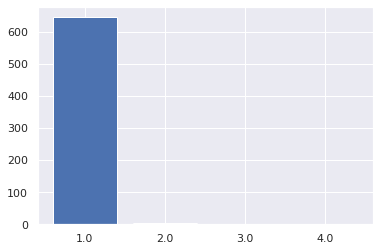

In [274]:
import matplotlib.pyplot as plt

timelapsecount = dict()
for i in timelapse:
    try:
        timelapsecount[i] += 1
    except:
        timelapsecount[i] = 1
timelapsecount = sorted(timelapsecount.items())
x, y = [], []
for i in timelapsecount:
    x.append(i[0])
    y.append(i[1])
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)), x)

# plt.bar(range(30),y[:30])
# plt.xticks(range(30), x[:30])

# plt.show()

print(x[:30])
print(y[:30])

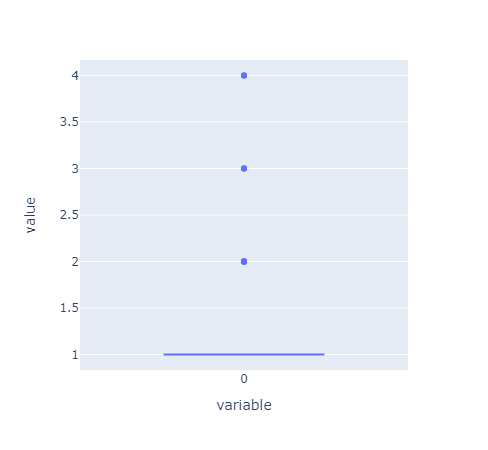

In [275]:
import plotly.express as px

fig = px.box(timelapse)
fig.show()

In [265]:
l1 = [18.0, 19.0, 20.0, 26.0, 30.0, 31.0, 34.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 44.0, 45.0, 46.0, 47.0, 48.0, 51.0, 52.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 65.0]
l1 = list(map(int,l1))
print(l1[1::2])

[19, 26, 31, 37, 39, 41, 44, 46, 48, 52, 56, 58, 60, 62, 65]
